# Figure Generation for Manuscript

## Overview
This notebook outlines the generation of **Figure 1** and **Supplementary Figures S3, S6, S7, and S8** for the manuscript. Detailed steps, including data processing, visualization parameters, and export settings, are included to ensure reproducibility.

---

## **Figure 1: RISK Analysis of the Yeast PPI Network and Workflow Overview**
### Description
Figure 1 provides a visualization of the **yeast protein–protein interaction (PPI) network** from **Michaelis et al. (2023)** using **RISK**, highlighting **biologically meaningful clusters**. The network was **pruned to 2,059 nodes and 27,690 edges** by retaining nodes with **six or more interactions** to emphasize **functionally relevant clusters**. **Gene Ontology Biological Process (GO BP) terms** are color-coded to represent key cellular processes, including **ribosomal assembly, mitochondrial organization, and RNA polymerase activity** (**P < 0.0001**).

### Generation Steps
1. Load the **pruned yeast PPI network** from **Michaelis et al. (2023)**.
2. Apply **RISK** to generate clusters with **GO BP annotations**.
3. Visualize the network with **functionally enriched clusters** color-coded.
4. Export the figure in high-resolution formats (**SVG, PNG**) for publication.

---

## **Supplementary Figure S3: Comparative Analysis of the Yeast PPI Network Using RISK and SAFE**
### Description
Supplementary Figure S3 provides a **comparative analysis** of **RISK and SAFE** applied to the **yeast PPI network** from **Michaelis et al. (2023)**. The network was **pruned to 2,059 nodes and 27,690 edges** by retaining nodes with **six or more interactions** to emphasize functionally relevant clusters.

- **(A)** Visualization of the yeast PPI network.
- **(B)** RISK identified **59 Gene Ontology Biological Process (GO BP) clusters** using the **Louvain algorithm**.
- **(C)** SAFE identified **48 GO BP clusters** using the **shortest-path algorithm**.
- **(D)** Quantitative comparison of clustering metrics. RISK exhibited **significantly higher compactness (P < 0.001), separation (P < 0.01), and silhouette scores (0.10 vs. 0.06)**, indicating more cohesive, high-quality clusters. **Statistical comparisons were performed using the Mann-Whitney U test**.

### Generation Steps
1. Load the **pruned yeast PPI network** from **Michaelis et al. (2023)**.
2. Apply **RISK** to generate **59 clusters** using **Louvain clustering**.
3. Apply **SAFE** to generate **48 clusters** using **shortest-path clustering**.
4. Compare clustering metrics (**compactness, separation, silhouette scores**) using statistical tests.
5. Export high-resolution figure panels for manuscript submission.

---

## **Supplementary Figure S6: Comparative Analysis of Biologically Significant Nodes and Clusters Between RISK and SAFE**
### Description
Supplementary Figure S6 evaluates **biologically significant nodes and clusters** in the **yeast PPI network** from **Michaelis et al. (2023)** using **RISK and SAFE**. The network was **pruned to 2,059 nodes and 27,690 edges** to emphasize functionally relevant clusters.

- **(A–D)** Analysis of **RISK clusters** with biologically significant nodes identified by SAFE.
- **(E–H)** Analysis of **SAFE clusters** with biologically significant nodes identified by RISK.
- **Comparisons include** GO BP annotations, kernel density estimate (KDE) overlays, shared nodes, and uniquely identified nodes.

### Generation Steps
1. Load the **pruned yeast PPI network**.
2. Identify **biologically significant nodes** from both RISK and SAFE.
3. Perform KDE analysis to visualize **spatial distributions** of key nodes.
4. Compare **shared vs. unique clusters** identified by each method.
5. Export high-resolution figure panels.

---

## **Supplementary Figure S7: RISK Analysis of Biologically Significant GO BP Terms**
### Description
Supplementary Figure S7 presents **RISK-based clustering and GO BP overrepresentation analysis** for the **yeast PPI network** from **Michaelis et al. (2023)**. The network was **pruned to 2,059 nodes and 27,690 edges** to emphasize functionally relevant clusters.

- **(A)** Visualization of the yeast PPI network with clusters labeled.
- **(B)** Table of significantly enriched GO BP terms, including cluster IDs, P-values, and FDR corrections.

### Generation Steps
1. Load the **pruned yeast PPI network**.
2. Apply **RISK** to generate functional clusters.
3. Compute **GO BP overrepresentation analysis** for each cluster.
4. Format results into a **summary table**.
5. Export figure panels.

---

## **Supplementary Figure S8: SAFE Analysis of Biologically Significant GO BP Terms**
### Description
Supplementary Figure S8 presents **SAFE-based clustering and GO BP overrepresentation analysis** for the **yeast PPI network** from **Michaelis et al. (2023)**. The network was **pruned to 2,059 nodes and 27,690 edges** to emphasize functionally relevant clusters.

- **(A)** Visualization of the yeast PPI network with clusters labeled.
- **(B)** Table of significantly enriched GO BP terms, including cluster IDs, P-values, and FDR corrections.

### Generation Steps
1. Load the **pruned yeast PPI network**.
2. Apply **SAFE** to generate functional clusters.
3. Compute **GO BP overrepresentation analysis** for each cluster.
4. Format results into a **summary table**.
5. Export figure panels.

---

## Workflow
- **Input Data**: Yeast PPI network, RISK and SAFE clustering outputs.
- **Tools Used**: Python, RISK, Cytoscape, NetworkX, Matplotlib/Seaborn.
- **Output**: High-resolution figures for **Figure 1, Supplementary Figures S3, S6, S7, and S8**.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import risk

In [2]:
# Check the version of the RISK package to ensure it's installed correctly

risk.__version__

'0.0.9-beta.45'

In [2]:
# Load RISK object and initialize

from risk import RISK

risk = RISK(verbose=True)

In [9]:
# Load the network from a Cytoscape file for RISK analysis

network = risk.load_cytoscape_network(
    filepath="./data/cytoscape/michaelis_2023.cys",
    source_label="source",
    target_label="target",
    view_name="",
    compute_sphere=True,
    surface_depth=0.1,
    min_edges_per_node=0,
)

# Load GO Biological Process (BP) annotations from a JSON file and associate them with the existing network
annotations = risk.load_json_annotation(
    network=network,
    filepath="./data/json/annotations/go_biological_process.json",
    min_nodes_per_term=1,
)

---------------
Loading network
---------------
Filetype: Cytoscape
Filepath: ./data/cytoscape/michaelis_2023.cys
Minimum edges per node: 0
Projection: Sphere
Surface depth: 0.1
Initial node count: 2059
Final node count: 2059
Initial edge count: 27690
Final edge count: 27690
-------------------
Loading annotations
-------------------
Filetype: JSON
Filepath: ./data/json/annotations/go_biological_process.json
Minimum number of nodes per annotation term: 1
Number of input annotation terms: 2214
Number of remaining annotation terms: 1813


In [10]:
# Perform annotation significance analysis by computing p-values for network neighborhoods using the permutation test

neighborhoods = risk.load_neighborhoods_by_permutation(
    network=network,
    annotations=annotations,
    distance_metric="louvain",
    louvain_resolution=10.0,
    leiden_resolution=1.0,
    fraction_shortest_edges=0.275,
    score_metric="stdev",
    null_distribution="network",
    num_permutations=1_000,
    random_seed=887,
    max_workers=6,
)

------------------------
Running permutation test
------------------------
Neighborhood scoring metric: 'stdev'
Number of permutations: 1000
Maximum workers: 6
Null distribution: 'network'
Distance metric: 'louvain (resolution=10.0)'
Edge length threshold: 0.275
Random seed: 887


Total progress: 100%|████████████████████████████████████████████████| 1000/1000 [00:31<00:00, 32.20it/s]


In [11]:
# Get the NetworkGraph object for plotting

graph = risk.load_graph(
    network=network,
    annotations=annotations,
    neighborhoods=neighborhoods,
    tail="right",
    pval_cutoff=0.05,
    fdr_cutoff=1.00,
    impute_depth=0,
    prune_threshold=0.125,
    linkage_criterion="distance",
    linkage_method="single",
    linkage_metric="dice",
    linkage_threshold="auto",
    min_cluster_size=4,
    max_cluster_size=1_000,
)

---------------------------------
Finding significant neighborhoods
---------------------------------
p-value cutoff: 0.05
FDR BH cutoff: 1.0
Significance tail: 'right' (enrichment)
------------------------
Processing neighborhoods
------------------------
Imputation depth: 0
Pruning threshold: 0.125
-----------------------
Finding top annotations
-----------------------
Min cluster size: 4
Max cluster size: 1000
-----------------------------------------
Optimizing distance threshold for domains
-----------------------------------------


Evaluating optimal linkage method and metric: 100%|███████████████████████████████████| 1/1 [00:02<00:00]


Linkage criterion: 'distance'
Linkage method: 'single'
Linkage metric: 'dice'
Linkage threshold: 0.001


---------------
Loading plotter
---------------


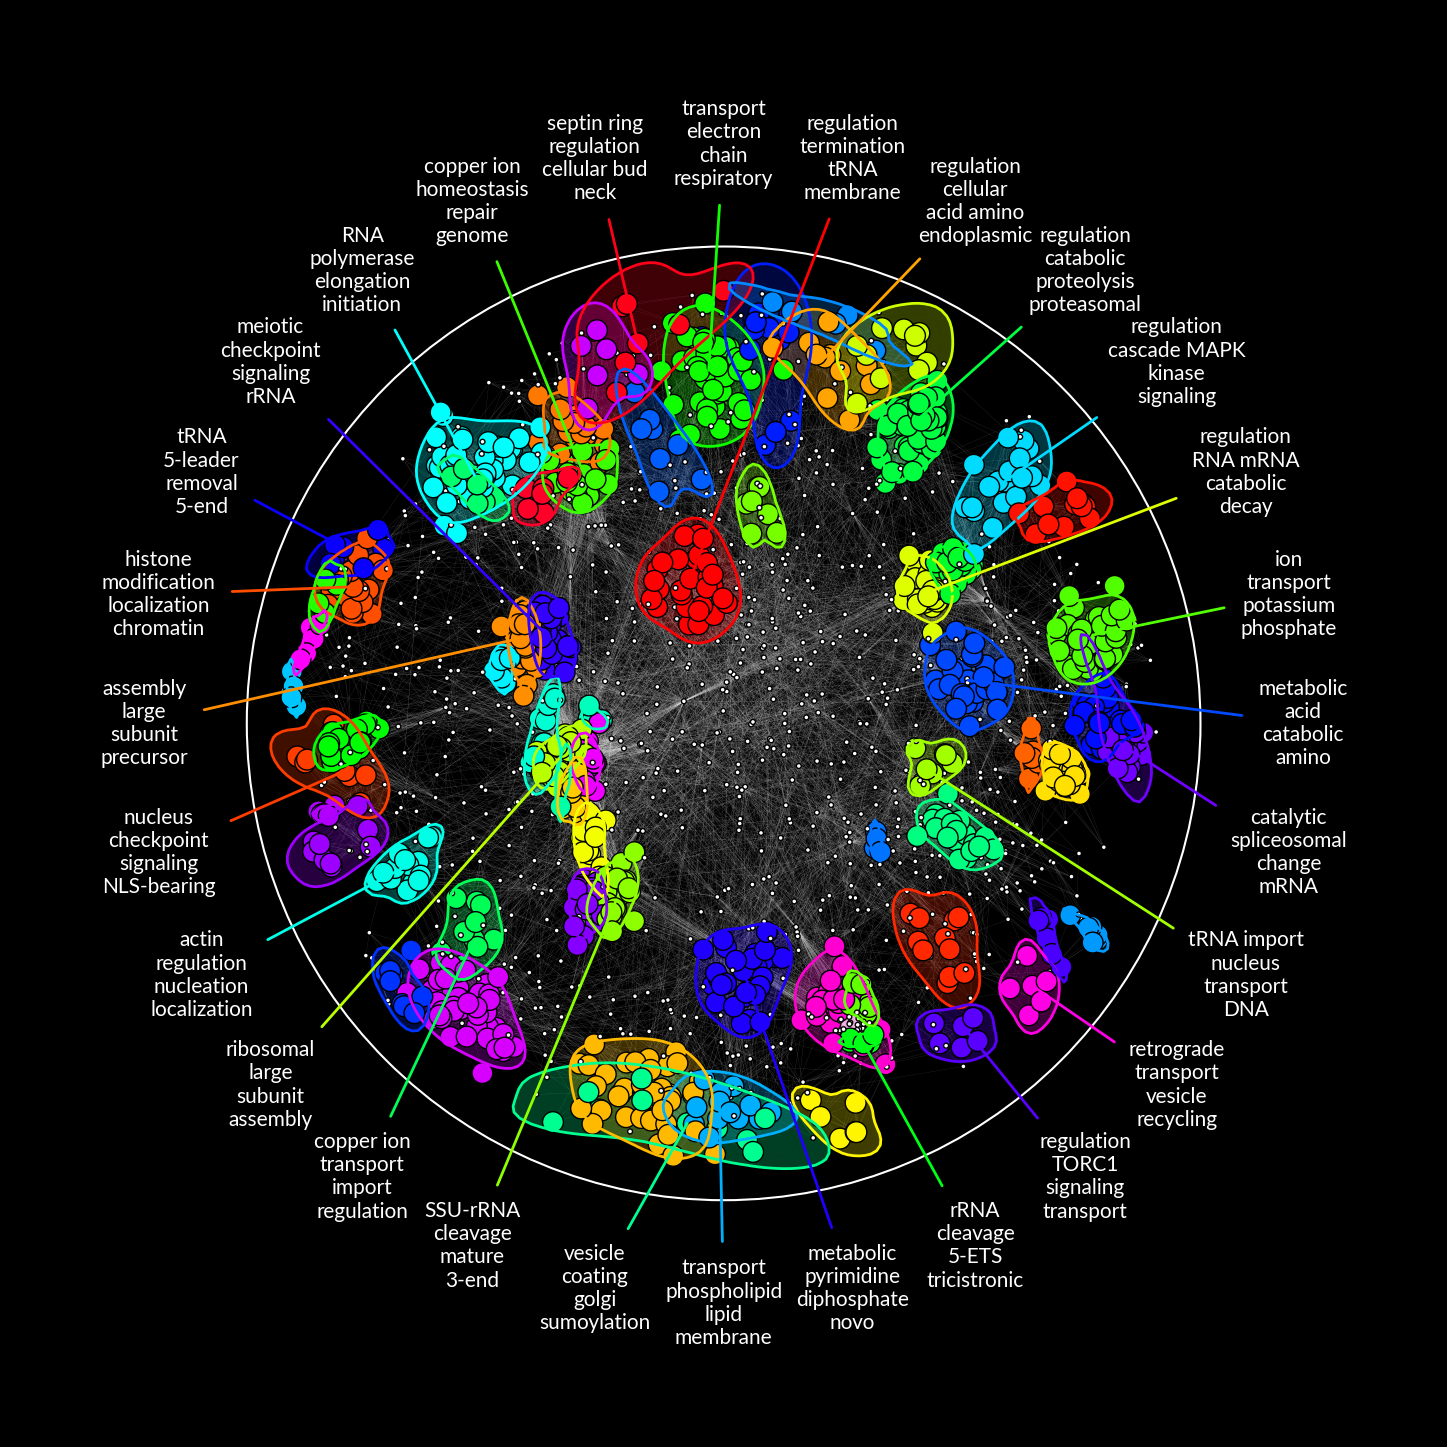

In [12]:
import copy

# For aesthetics reasons, pop domain 114, but keep the domain when performing benchmark testing with SAFE
graph_copy = copy.deepcopy(graph)
graph_copy.pop(114)

# Set random seed for reproducibility
random_seed = 806

# Initialize the NetworkPlotter with the NetworkGraph object
plotter = risk.load_plotter(
    graph=graph_copy,
    figsize=(15, 15),
    background_color="black",
)

# Plot network perimeter as a circle
plotter.plot_circle_perimeter(
    scale=1.05,
    center_offset_x=0.0,
    center_offset_y=0.0,
    linestyle="solid",
    linewidth=1.5,
    color="white",
    outline_alpha=1.0,
    fill_alpha=0.0,
)

# Plot network nodes and edges
plotter.plot_network(
    node_size=plotter.get_annotated_node_sizes(
        significant_size=225,
        nonsignificant_size=12.5,
    ),
    node_shape="o",
    node_edgewidth=1.0,
    edge_width=0.04,
    node_color=plotter.get_annotated_node_colors(
        cmap="gist_rainbow",
        color=None,
        blend_colors=False,
        blend_gamma=2.2,
        min_scale=1.0,
        max_scale=1.0,
        scale_factor=0.5,
        alpha=1.0,
        nonsignificant_color="white",
        nonsignificant_alpha=0.75,
        ids_to_colors=None,
        random_seed=random_seed,
    ),
    node_edgecolor="black",
    edge_color="white",
    node_alpha=1.0,
    edge_alpha=1.0,
)

# Plot KDE-based contours around network nodes
plotter.plot_contours(
    levels=5,
    bandwidth=0.8,
    grid_size=250,
    color=plotter.get_annotated_contour_colors(
        cmap="gist_rainbow",
        blend_colors=False,
        blend_gamma=2.2,
        min_scale=1.0,
        max_scale=1.0,
        scale_factor=0.5,
        ids_to_colors=None,
        random_seed=random_seed,
    ),
    linestyle="solid",
    linewidth=2.0,
    alpha=1.0,
    fill_alpha=0.25,
)

# Plot labels on the network
plotter.plot_labels(
    scale=1.1,
    offset=0.12,
    font="Lato",
    fontcase={"title": "lower"},
    fontsize=15,
    fontcolor="white",
    fontalpha=1.0,
    arrow_linewidth=2.0,
    arrow_style="-",
    arrow_color=plotter.get_annotated_label_colors(
        cmap="gist_rainbow",
        color=None,
        blend_colors=False,
        blend_gamma=2.2,
        min_scale=1.0,
        max_scale=1.0,
        scale_factor=0.5,
        ids_to_colors=None,
        random_seed=random_seed,
    ),
    arrow_alpha=1.0,
    arrow_base_shrink=10.0,
    arrow_tip_shrink=0.0,
    max_labels=28,
    min_label_lines=2,
    max_label_lines=4,
    min_chars_per_line=3,
    max_chars_per_line=12,
    words_to_omit=[
        "process",
        "cvt",
        "compound",
        "one-carbon",
        "response",
        "poly",
        "transduction",
        "generate",
        "involved",
        "cell",
        "between",
        "global",
        "biosynthetic",
        "positive",
        "negative",
        "protein",
        "complex",
        "changes",
        "cis",
    ],
    overlay_ids=False,
    ids_to_keep=[
        7,
        13,
        17,
        20,
        22,
        23,
        24,
        25,
        27,
        43,
        48,
        53,
        57,
        59,
        64,
        65,
        70,
        77,
        79,
        87,
        95,
        99,
        105,
        107,
        113,
        116,
        122,
        131,
    ],
    ids_to_labels=None,
)

# Save fig in publication folder
# 350 DPI required for journal Bioinformatics
# plotter.savefig("./png/publication/fig_1a.png", bbox_inches="tight", dpi=350)

# Display the plot
plotter.show()

## Supplementary Figure S3.A

Empty yeast protein interactome network

---------------
Loading plotter
---------------


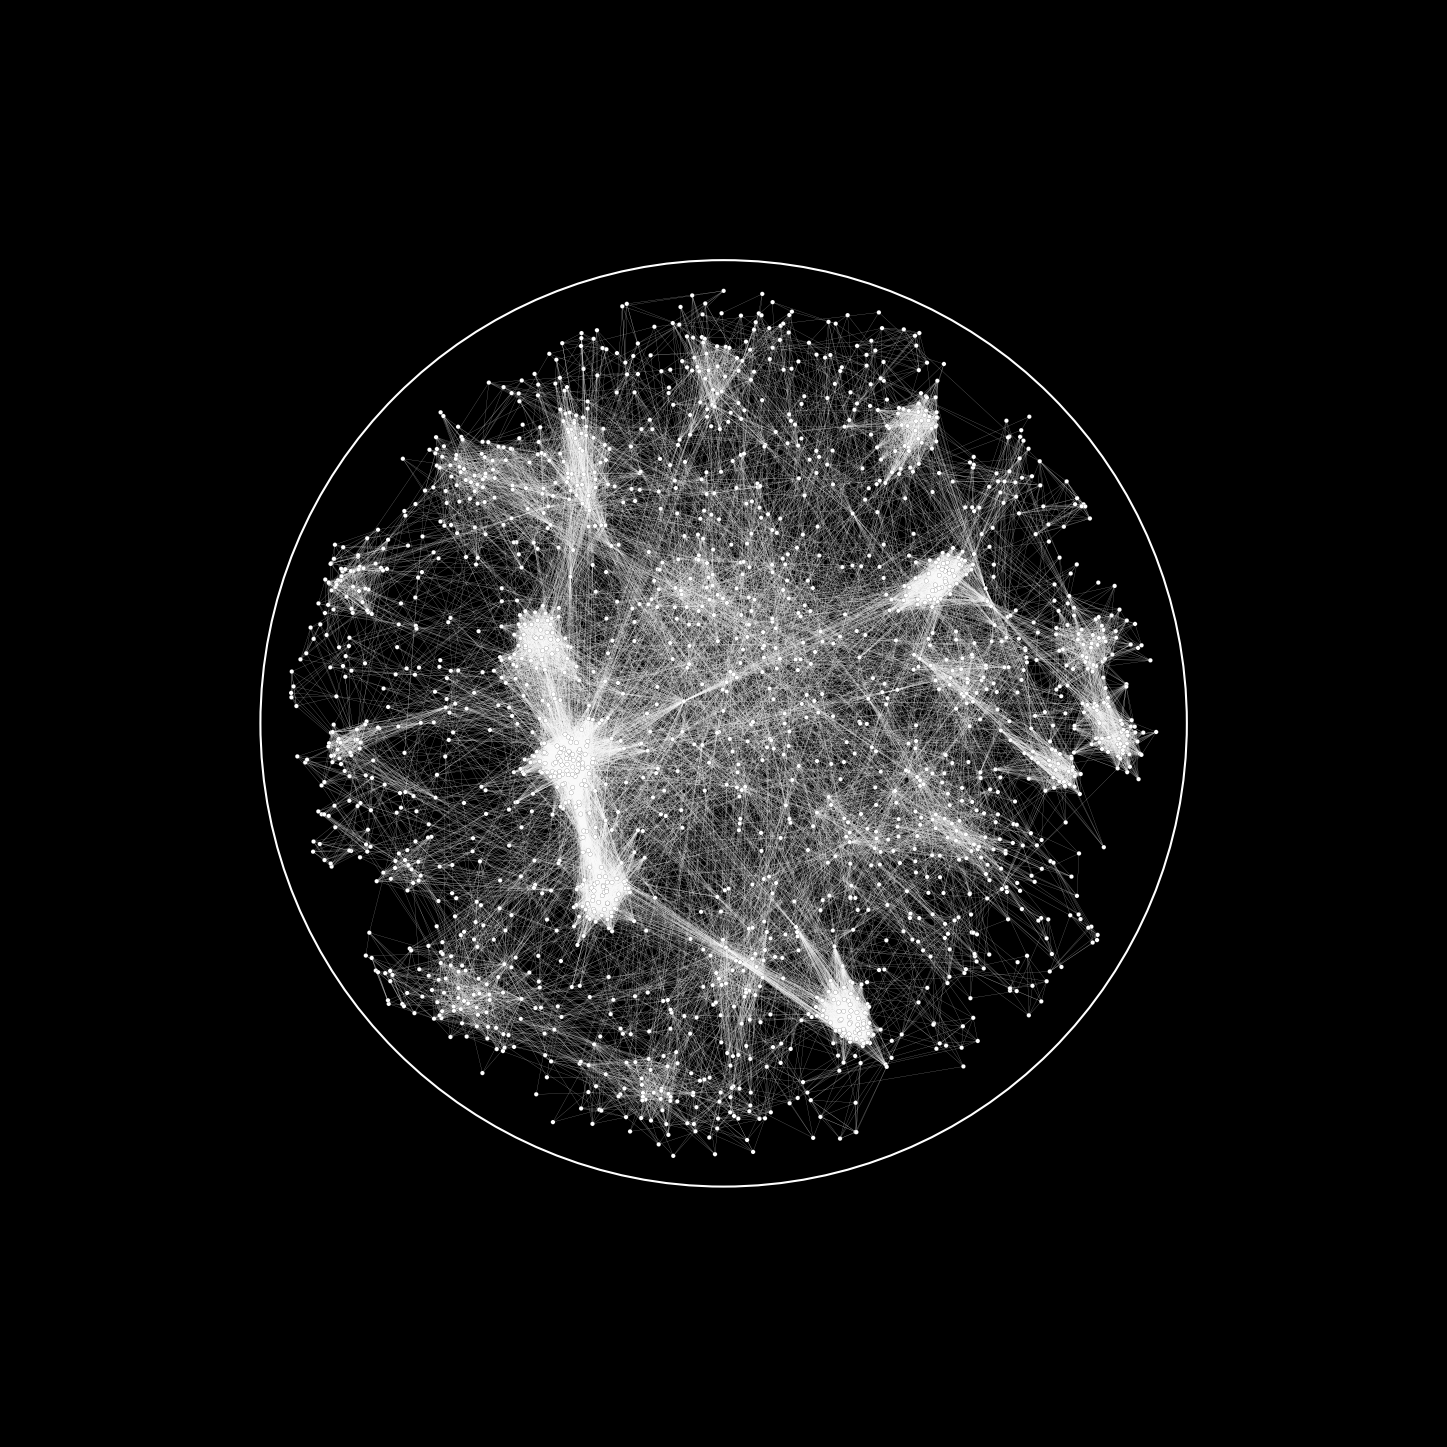

In [40]:
# Set random seed for reproducibility
random_seed = 806

# Initialize the NetworkPlotter with the NetworkGraph object
plotter = risk.load_plotter(
    graph=graph,
    figsize=(15, 15),
    background_color="black",
)

# Plot network perimeter as a circle
plotter.plot_circle_perimeter(
    scale=1.02,
    center_offset_x=0.0,
    center_offset_y=0.0,
    linestyle="solid",
    linewidth=1.5,
    color="white",
    outline_alpha=1.0,
    fill_alpha=0.0,
)

# Plot network nodes and edges
plotter.plot_network(
    node_size=plotter.get_annotated_node_sizes(
        significant_size=10,
        nonsignificant_size=10,
    ),
    node_shape="o",
    node_edgewidth=0.1,
    edge_width=0.1,
    node_color="white",
    node_edgecolor="black",
    edge_color="white",
    node_alpha=1.0,
    edge_alpha=1.0,
)

# 350 DPI required for journal Bioinformatics
# plotter.savefig("./png/publication/supp_fig_3a.png", bbox_inches="tight", dpi=350)

# Display the plot
plotter.show()

## Supplementary Figure S3.B

RISK analysis of the yeast interactome network

---------------
Loading plotter
---------------


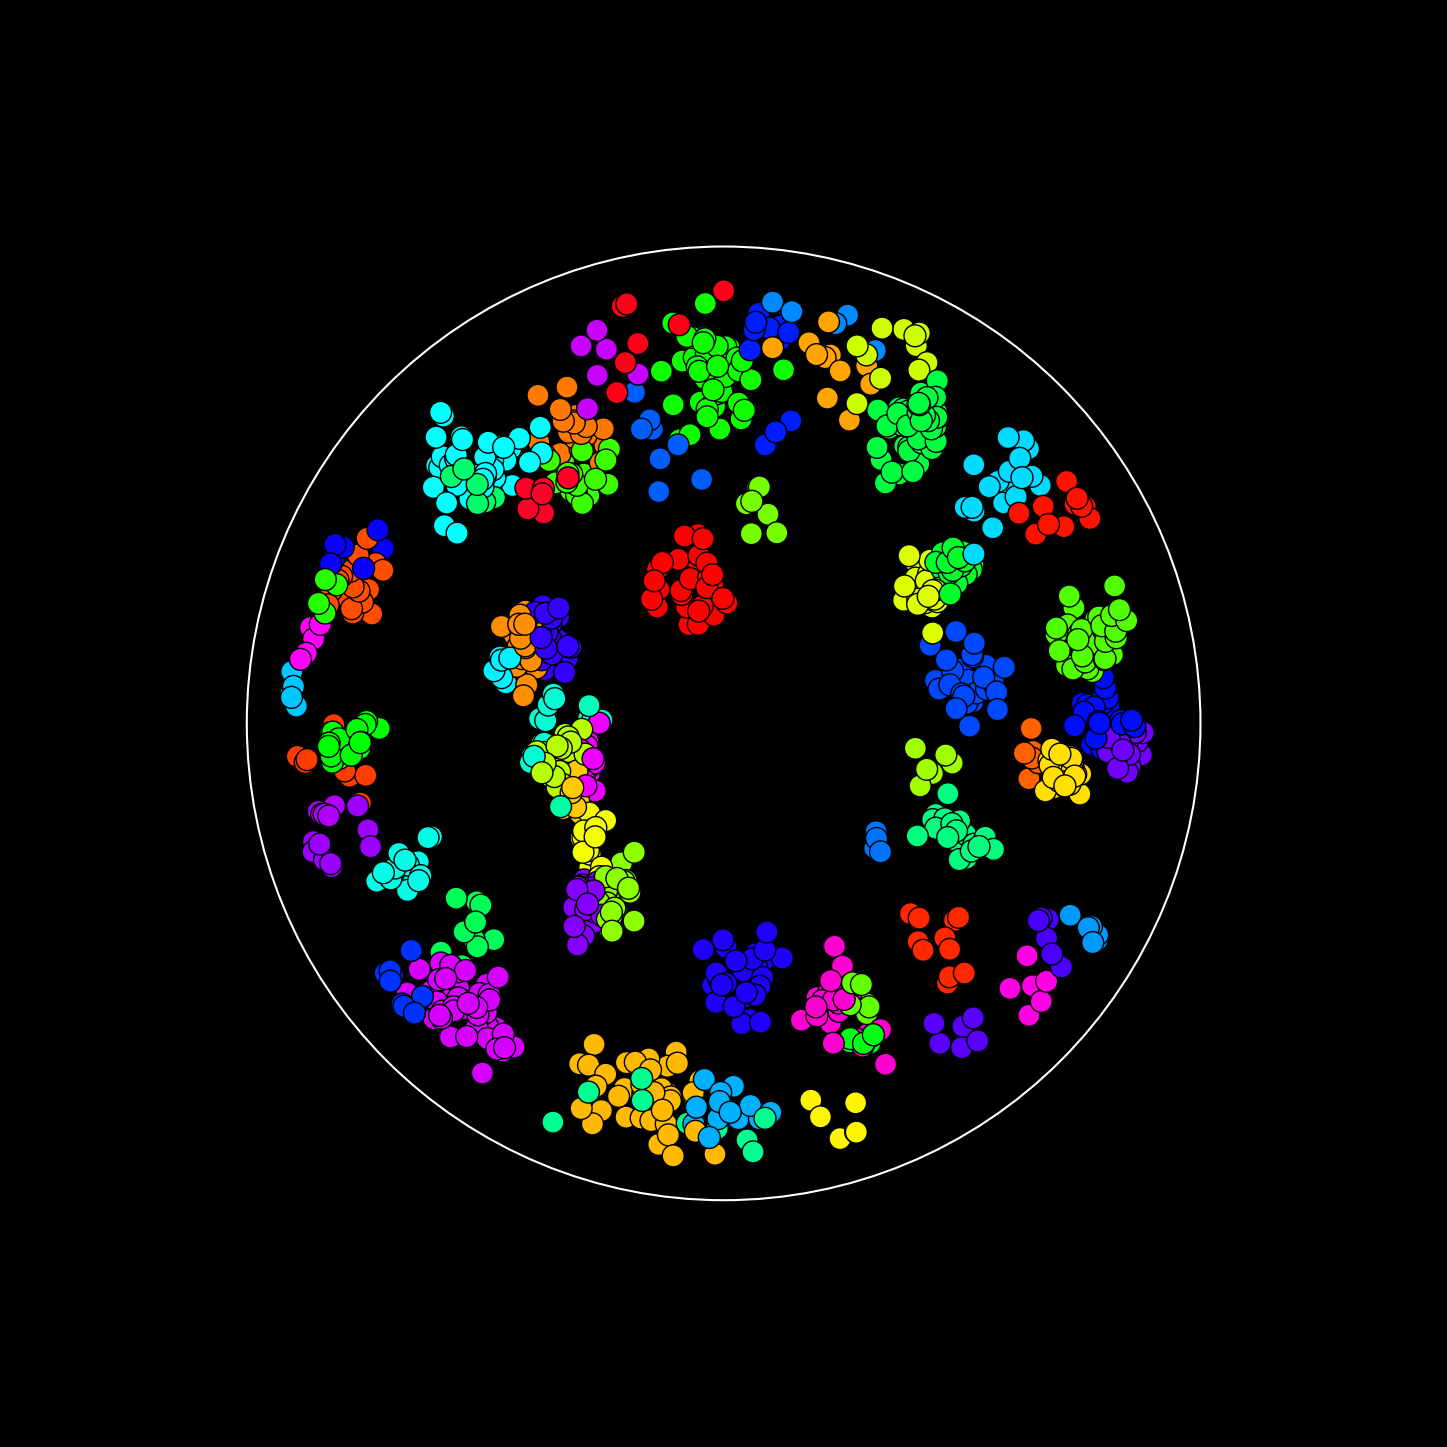

In [41]:
# Set random seed for reproducibility
random_seed = 806

# Initialize the NetworkPlotter with the NetworkGraph object
plotter = risk.load_plotter(
    graph=graph_copy,
    figsize=(15, 15),
    background_color="black",
)

# Plot network perimeter as a circle
plotter.plot_circle_perimeter(
    scale=1.05,
    center_offset_x=0.0,
    center_offset_y=0.0,
    linestyle="solid",
    linewidth=1.5,
    color="white",
    outline_alpha=1.0,
    fill_alpha=0.0,
)

# Plot network nodes and edges
plotter.plot_network(
    node_size=plotter.get_annotated_node_sizes(
        significant_size=250,
        nonsignificant_size=0,
    ),
    node_shape="o",
    node_edgewidth=1.0,
    edge_width=0.0,
    node_color=plotter.get_annotated_node_colors(
        cmap="gist_rainbow",
        color=None,
        blend_colors=False,
        blend_gamma=2.2,
        min_scale=1.0,
        max_scale=1.0,
        scale_factor=0.5,
        alpha=1.0,
        nonsignificant_color="white",
        nonsignificant_alpha=0.75,
        ids_to_colors=None,
        random_seed=random_seed,
    ),
    node_edgecolor="black",
    edge_color="white",
    node_alpha=1.0,
    edge_alpha=1.0,
)

# 350 DPI required for journal Bioinformatics
# plotter.savefig("./png/publication/supp_fig_3b.png", bbox_inches="tight", dpi=350)

# Display the plot
plotter.show()

## Supplementary Figure S3.D (Figure S3.C in a separate notebook using SAFE)

RISK vs SAFE analysis of the yeast interactome network (bar plot)

In [158]:
import matplotlib.pyplot as plt


# Set the background to black for all plots
plt.rcParams["figure.facecolor"] = "black"  # Set the figure background color
plt.rcParams["axes.facecolor"] = "black"  # Set the axes background color
plt.rcParams["savefig.facecolor"] = "black"  # Set the background for saved figures
plt.rcParams["axes.edgecolor"] = "white"  # Optional: Make the axis edge white for visibility
plt.rcParams["axes.labelcolor"] = "white"  # Optional: Make axis labels white
plt.rcParams["xtick.color"] = "white"  # Optional: Make x-ticks white
plt.rcParams["ytick.color"] = "white"  # Optional: Make y-ticks white
plt.rcParams["text.color"] = "white"  # Optional: Set text color to white

In [159]:
import json


def read_json_from_file(filename):
    with open(filename, "r") as file:
        return json.load(file)


def write_json_to_file(data, filename):
    with open(filename, "w") as file:
        json.dump(data, file, indent=4)

In [160]:
# Define base network to use as a reference for distance-related analyses

base_network = graph.network.copy()

In [161]:
# Get RISK domain to ids

risk_domain_to_ids_map = graph.domain_id_to_node_ids_map
risk_domain_to_labels_map = graph.domain_id_to_node_labels_map
print(f"Number of domains in RISK: {len(risk_domain_to_ids_map)}")

# write_json_to_file(risk_domain_to_labels_map, './data/json/domains/20241105_risk_domains_michaelis_2023_tidied.json')

Number of domains in RISK: 68


In [14]:
# Get SAFE domain to ids

# Read the JSON file and load it into a Python dictionary - 2024-11-05 is a sufficient
with open(
    "../safe_network/data/json/domains/20250130_safe_domains_michaelis_2023.json", "r"
) as json_file:
    safe_domain_to_ids_map = {int(k): v for k, v in json.load(json_file).items()}
    # Remove 0 domain - it's garbage collection
    safe_domain_to_ids_map.pop(0)
    safe_domain_to_labels_map = {
        k: [graph.node_id_to_node_label_map[v_] for v_ in v]
        for k, v in safe_domain_to_ids_map.items()
    }
print(f"Number of domains in SAFE: {len(safe_domain_to_ids_map)}")

# write_json_to_file(safe_domain_to_labels_map, './data/json/domains/20241105_safe_domains_michaelis_2023_tidied.json')

Number of domains in SAFE: 46


In [15]:
from itertools import combinations
import numpy as np
from sklearn.metrics import silhouette_score


def calculate_network_diameter(network, exact=False):
    """Calculate the network diameter (maximum Euclidean distance) efficiently."""
    positions = np.array([[node_data["x"], node_data["y"]] for node_data in network.nodes.values()])

    if not exact:
        # Approximation using bounding box
        min_x, max_x = positions[:, 0].min(), positions[:, 0].max()
        min_y, max_y = positions[:, 1].min(), positions[:, 1].max()

        # Compute distances between extreme points of the bounding box
        extreme_points = [[min_x, min_y], [min_x, max_y], [max_x, min_y], [max_x, max_y]]
        max_distance = max(
            np.linalg.norm(np.array(p1) - np.array(p2))
            for p1, p2 in combinations(extreme_points, 2)
        )
    else:
        # Exact calculation for all pairs (O(n^2))
        max_distance = max(
            np.linalg.norm(positions[i] - positions[j])
            for i, j in combinations(range(len(positions)), 2)
        )

    return max_distance


def calculate_clustering_metrics(network, domain_to_ids_map, network_diameter=None):
    compactness_scores = {}
    separation_scores = {}

    # Initialize lists for silhouette score calculation
    X = []  # List of node positions
    labels = []  # Corresponding list of cluster labels for each node

    # Compute network diameter if not provided
    if network_diameter is None:
        network_diameter = calculate_network_diameter(network, exact=False)

    # Ensure we don't divide by zero
    if network_diameter == 0:
        network_diameter = 1.0

    # Calculate compactness and separation
    centroids = {}
    for domain, node_ids in domain_to_ids_map.items():
        positions = np.array(
            [[network.nodes[node_id]["x"], network.nodes[node_id]["y"]] for node_id in node_ids]
        )

        # Compactness: Average pairwise distance within each cluster (normalized)
        if len(positions) > 1:
            pairwise_distances = [
                np.linalg.norm(positions[i] - positions[j])
                for i, j in combinations(range(len(positions)), 2)
            ]
            compactness_scores[domain] = np.mean(pairwise_distances) / network_diameter
        else:
            compactness_scores[domain] = 0  # Single-node clusters have 0 compactness by definition

        # Compute centroid for separation calculation
        centroids[domain] = np.mean(positions, axis=0)

        # Collect positions and labels for silhouette score calculation
        for pos in positions:
            X.append(pos)
            labels.append(domain)

    # Convert X and labels to NumPy arrays for consistency
    X = np.array(X)
    labels = np.array(labels)

    # Calculate separation: Minimum distance to other cluster centroids (normalized)
    for domain, centroid in centroids.items():
        other_centroids = [centroids[other] for other in centroids if other != domain]
        if other_centroids:
            min_separation = min(
                np.linalg.norm(centroid - other_centroid) for other_centroid in other_centroids
            )
            separation_scores[domain] = min_separation / network_diameter
        else:
            separation_scores[domain] = 0  # Only one cluster case

    # Calculate overall silhouette score
    overall_silhouette_score = silhouette_score(X, labels)

    # Return metrics
    return {
        "compactness": compactness_scores,
        "separation": separation_scores,
        "silhouette_score": overall_silhouette_score,
    }

In [16]:
# RISK

# Precompute network diameter
risk_network_diameter = calculate_network_diameter(base_network, exact=False)
# Calculate clustering metrics
risk_metrics = calculate_clustering_metrics(
    base_network, risk_domain_to_ids_map, network_diameter=risk_network_diameter
)

# print("Compactness per cluster:", risk_metrics['compactness'])
# print("Separation per cluster:", risk_metrics['separation'])
print("Overall Silhouette Score:", risk_metrics["silhouette_score"])

Overall Silhouette Score: 0.28257064210642674


In [17]:
# SAFE

# Precompute network diameter
safe_network_diameter = calculate_network_diameter(base_network, exact=False)
# Calculate clustering metrics
safe_metrics = calculate_clustering_metrics(
    base_network, safe_domain_to_ids_map, network_diameter=safe_network_diameter
)

# print("Compactness per cluster:", risk_metrics['compactness'])
# print("Separation per cluster:", risk_metrics['separation'])
print("Overall Silhouette Score:", safe_metrics["silhouette_score"])

Overall Silhouette Score: 0.2397494183157343


In [18]:
# This script compares clustering metrics (compactness and separation) between RISK and SAFE.
# It selects the top N clusters based on compactness for each tool, where N is the maximum common cluster count.
# Metrics are then recalculated and summarized as means and standard deviations for compactness and separation.
# Assumes `safe_metrics` and `risk_metrics` are precomputed dictionaries with 'compactness', 'separation',
# and 'silhouette_score' as keys and domain-specific metrics as values.

import numpy as np

# Assume safe_metrics and risk_metrics have already been calculated
safe_compactness = safe_metrics["compactness"]
risk_compactness = risk_metrics["compactness"]
safe_separation = safe_metrics["separation"]
risk_separation = risk_metrics["separation"]
safe_silhouette = safe_metrics["silhouette_score"]
risk_silhouette = risk_metrics["silhouette_score"]

# Determine the max count of clusters between SAFE and RISK
max_cluster_count = min(len(safe_compactness), len(risk_compactness))

# Sort and select top N clusters based on compactness
top_safe_compactness = dict(
    sorted(safe_compactness.items(), key=lambda item: item[1])[:max_cluster_count]
)
top_risk_compactness = dict(
    sorted(risk_compactness.items(), key=lambda item: item[1])[:max_cluster_count]
)

top_safe_separation = {domain: safe_separation[domain] for domain in top_safe_compactness}
top_risk_separation = {domain: risk_separation[domain] for domain in top_risk_compactness}

# Re-calculate the means of the selected top clusters
safe_compactness_mean = np.mean(list(top_safe_compactness.values()))
safe_compactness_std = np.std(list(top_safe_compactness.values()))
risk_compactness_mean = np.mean(list(top_risk_compactness.values()))
risk_compactness_std = np.std(list(top_risk_compactness.values()))

safe_separation_mean = np.mean(list(top_safe_separation.values()))
safe_separation_std = np.std(list(top_safe_separation.values()))
risk_separation_mean = np.mean(list(top_risk_separation.values()))
risk_separation_std = np.std(list(top_risk_separation.values()))

# Print results
print("Top N SAFE Compactness (mean, std):", safe_compactness_mean, safe_compactness_std)
print("Top N RISK Compactness (mean, std):", risk_compactness_mean, risk_compactness_std)
print("Top N SAFE Separation (mean, std):", safe_separation_mean, safe_separation_std)
print("Top N RISK Separation (mean, std):", risk_separation_mean, risk_separation_std)

Top N SAFE Compactness (mean, std): 0.049504026176762805 0.044688713723408234
Top N RISK Compactness (mean, std): 0.02080804449266392 0.0055970335770992264
Top N SAFE Separation (mean, std): 0.03715497522013816 0.02208432008213604
Top N RISK Separation (mean, std): 0.03614642879918263 0.01779881079933179


# SAFE Groups: 46 : # RISK Groups: 68
Compactness Mann-Whitney U: U=2005.0, p-value=0.005476142471089933
Separation Mann-Whitney U: U=1455.0, p-value=0.2654219553843642
Silhouette Score Mann-Whitney U: U=0.0, p-value=1.0


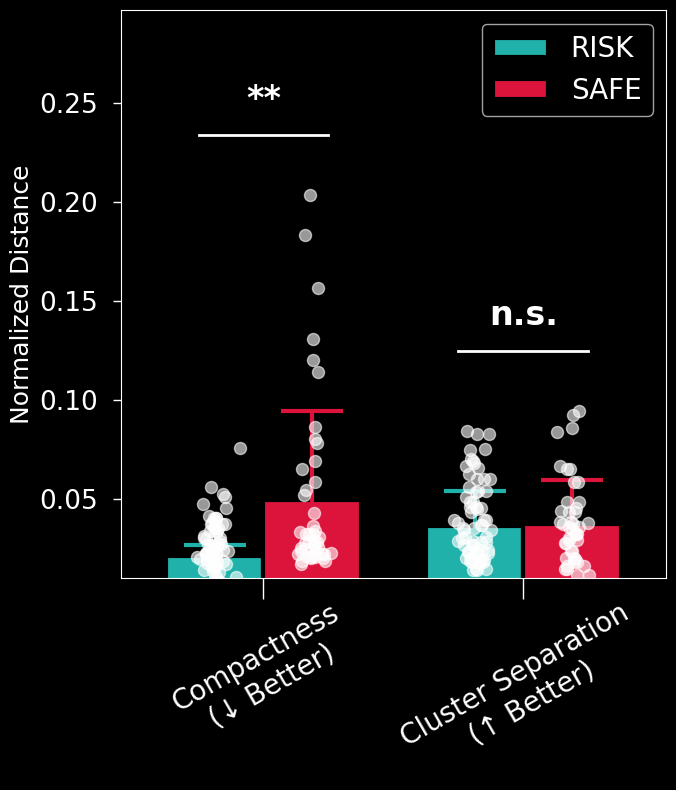

In [62]:
"""
This script generates a comparative bar chart and scatter plot to visualize clustering metrics 
(compactness, separation, silhouette score) for SAFE and RISK. It includes statistical significance 
testing using the Mann-Whitney U test to assess differences between the tools. Annotations highlight 
significant results directly on the plot. This visualization is tailored for publication-quality 
figures and supports a critical evaluation of clustering performance across metrics.

Key Features:
1. Bar chart with error bars for compactness and separation.
2. Scatter points for silhouette scores.
3. Jittered scatter points overlaid on bars to represent individual cluster metrics.
4. Mann-Whitney U test results annotated for significance.
5. Flexible y-axis range adjustment and aesthetic customization for publication readiness.

Inputs:
- Precomputed SAFE and RISK metrics (compactness, separation, silhouette scores).
- Statistical significance thresholds for Mann-Whitney U test annotations.

Outputs:
- Comparative bar chart with significance annotations.
- Printout of Mann-Whitney U test results for compactness, separation, and silhouette score.
"""

from matplotlib.ticker import MultipleLocator
from scipy.stats import mannwhitneyu


np.random.seed(888)

# Example data (replace with actual values)
metrics = [
    "Compactness\n(↓ Better)",
    "Cluster Separation\n(↑ Better)",
    "Silhouette Score\n(↑ Better)",
]
safe_means = [safe_compactness_mean, safe_separation_mean, safe_silhouette]
safe_stds = [safe_compactness_std, safe_separation_std, 0]  # No std deviation for silhouette
risk_means = [risk_compactness_mean, risk_separation_mean, risk_silhouette]
risk_stds = [risk_compactness_std, risk_separation_std, 0]  # No std deviation for silhouette

print(f"# SAFE Groups: {len(safe_compactness)} : # RISK Groups: {len(risk_compactness)}")
safe_data = [list(safe_compactness.values()), list(safe_separation.values()), [safe_silhouette]]
risk_data = [list(risk_compactness.values()), list(risk_separation.values()), [risk_silhouette]]

# Bar chart settings
fig, ax = plt.subplots(figsize=(8, 8))
bar_width = 0.375
x = np.arange(len(metrics) - 1)

safe_color = "#DC143C"  # Crimson for SAFE
risk_color = "#20B2AA"  # Light Sea Green for RISK

# Plot RISK bars first (swap positions with SAFE)
ax.bar(
    x - bar_width / 2,
    risk_means[:2],
    bar_width,
    yerr=risk_stds[:2],
    color=risk_color,
    edgecolor="black",
    linewidth=3,
    capsize=22,
    label="RISK",
    error_kw=dict(ecolor=risk_color, lw=3, capthick=3),
)
ax.bar(
    x + bar_width / 2,
    safe_means[:2],
    bar_width,
    yerr=safe_stds[:2],
    color=safe_color,
    edgecolor="black",
    linewidth=3,
    capsize=22,
    label="SAFE",
    error_kw=dict(ecolor=safe_color, lw=3, capthick=3),
)

# Overlay white jittered scatter points with transparency for RISK
for i, data in enumerate(risk_data[:2]):
    jitter = np.random.normal(0, 0.03, len(data))  # Small jitter
    ax.scatter(
        np.full(len(data), x[i] - bar_width / 2) + jitter,
        data,
        color="white",
        s=75,
        alpha=0.6,
        zorder=3,
    )

# Overlay white jittered scatter points with transparency for SAFE
for i, data in enumerate(safe_data[:2]):
    jitter = np.random.normal(0, 0.03, len(data))  # Small jitter
    ax.scatter(
        np.full(len(data), x[i] + bar_width / 2) + jitter,
        data,
        color="white",
        s=75,
        alpha=0.6,
        zorder=3,
    )

# Customizations
ax.axhline(
    0, color="white", linewidth=1.5, linestyle="--"
)  # Solid white line at y=0 as reference point
ax.set_xticks(
    np.append(x, x[-1] + 1)
)  # Adjust x-axis ticks to include the silhouette score position
ax.set_xticklabels(metrics, fontsize=20)  # Set x-axis label font size

# Extend x and y tick marks
ax.tick_params(axis="x", pad=0, length=15, width=1)  # Extend x-axis tick marks towards labels
ax.tick_params(axis="y", pad=10, length=6, width=1)  # Extend y-axis tick marks towards labels

# CHANGE HERE FOR YLIM
correction = (max(safe_data[0]) - min(safe_data[0])) * 0.5
ax.set_ylim(0.01, max(safe_data[0]) + correction)  # Adjust the y-axis range as needed
ax.legend(loc="upper right", fontsize=20)  # Increase legend font size
# Set the y-axis tick interval
ax.yaxis.set_major_locator(MultipleLocator(0.05))
ax.set_ylabel("Normalized Distance", fontsize=18)
ax.tick_params(axis="y", labelsize=19)  # Customize y-tick font size

plt.xticks(rotation=30)  # Rotate x-tick labels
plt.tight_layout()
# Create a 5% (0.05) and 10% (0.1) padding in the
# x and y directions respectively.
plt.margins(0.1, 0)

# Convert compactness and separation to lists of numeric values
safe_compactness_values = list(safe_compactness.values())
risk_compactness_values = list(risk_compactness.values())
safe_separation_values = list(safe_separation.values())
risk_separation_values = list(risk_separation.values())

# Perform Mann-Whitney U test for each metric
compactness_stat, compactness_p = mannwhitneyu(
    safe_compactness_values, risk_compactness_values, alternative="greater"
)
separation_stat, separation_p = mannwhitneyu(
    safe_separation_values, risk_separation_values, alternative="less"
)
silhouette_stat, silhouette_p = mannwhitneyu(
    [safe_metrics["silhouette_score"]], [risk_metrics["silhouette_score"]], alternative="two-sided"
)

# Print results
print(f"Compactness Mann-Whitney U: U={compactness_stat}, p-value={compactness_p}")
print(f"Separation Mann-Whitney U: U={separation_stat}, p-value={separation_p}")
print(f"Silhouette Score Mann-Whitney U: U={silhouette_stat}, p-value={silhouette_p}")

# Define significance thresholds
significance_annotations = {
    "****": 0.0001,
    "***": 0.001,
    "**": 0.01,
    "*": 0.05,
}


def get_significance_text(p_value):
    for text, threshold in significance_annotations.items():
        if p_value <= threshold:
            return text
    return "n.s."  # Not significant


# Get significance text for each metric
compactness_text = get_significance_text(compactness_p)
separation_text = get_significance_text(separation_p)

# Annotate significance on the plot
safe_compactness_height = max(safe_compactness_values) + 0.03
ax.text(
    0,
    safe_compactness_height + 0.01,
    compactness_text,
    ha="center",
    va="bottom",
    color="white",
    weight="bold",
    fontsize=24,
)
ax.plot(
    [-0.25, 0.25], [safe_compactness_height, safe_compactness_height], color="white", linewidth=2
)

risk_separation_height = max(safe_separation_values) + 0.03
ax.text(
    1,
    risk_separation_height + 0.01,
    separation_text,
    ha="center",
    va="bottom",
    color="white",
    weight="bold",
    fontsize=24,
)
ax.plot([0.75, 1.25], [risk_separation_height, risk_separation_height], color="white", linewidth=2)

# 1,200 DPI required for line art in journal Bioinformatics
# plt.savefig("./png/publication/supp_fig_3d.png", bbox_inches="tight", dpi=1200)

plt.show()

## Supplementary Figure S6

RISK vs SAFE domain analysis of the yeast interactome network

In [163]:
import json

# Get RISK domain to ids
risk_domain_to_ids_map = graph.domain_id_to_node_ids_map
safe_domain_to_labels_map = graph.domain_id_to_node_labels_map
print(f"Number of domains in RISK: {len(risk_domain_to_ids_map)}")

# Get SAFE domain to ids
# Read the JSON file and load it into a Python dictionary
with open(
    "../safe_network/data/json/domains/20250130_safe_domains_michaelis_2023.json", "r"
) as json_file:
    safe_domain_to_ids_map = {int(k): v for k, v in json.load(json_file).items()}
    # Remove 0 domain - it's garbage collection
    safe_domain_to_ids_map.pop(0)
    safe_domain_to_labels_map = {
        k: [graph.node_id_to_node_label_map[v_] for v_ in v]
        for k, v in safe_domain_to_ids_map.items()
    }

print(f"Number of domains in SAFE: {len(safe_domain_to_ids_map)}")

Number of domains in RISK: 68
Number of domains in SAFE: 46


In [164]:
# Set global colors for RISK and SAFE

safe_color = "#DC143C"  # Crimson for SAFE
risk_color = "#20B2AA"  # Light Sea Green for RISK

## Supplementary Figure S6.B & S6.F

RISK / SAFE analysis of the yeast interactome network: Plot every cluster

---------------
Loading plotter
---------------


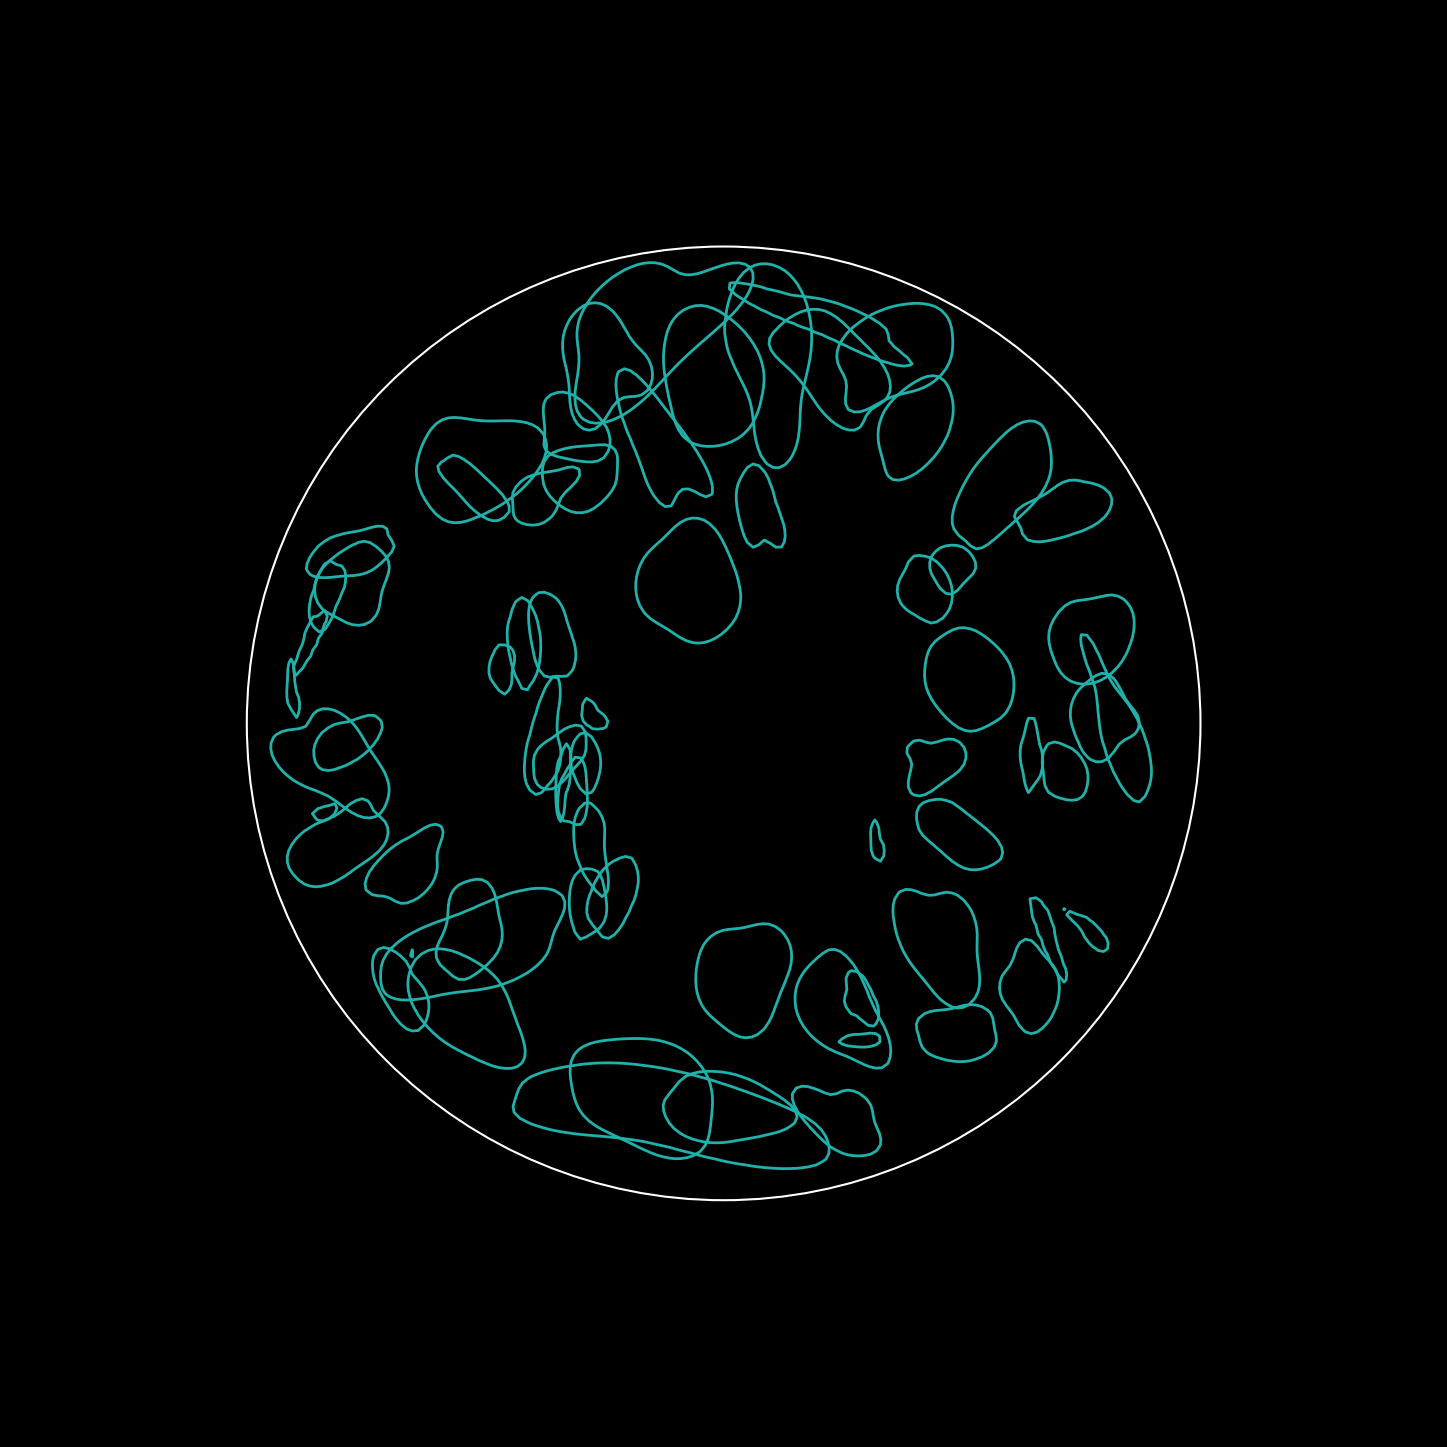

In [45]:
# RISK - ALL DOMAINS

# Set random seed for reproducibility
random_seed = 887

# Initialize the NetworkPlotter with the NetworkGraph object
plotter = risk.load_plotter(
    graph=graph,
    figsize=(15, 15),
    background_color="black",
)

# Plot network perimeter as a circle
plotter.plot_circle_perimeter(
    scale=1.05,
    center_offset_x=0.0,
    center_offset_y=0.0,
    linestyle="solid",
    linewidth=1.5,
    color="white",
    outline_alpha=1.0,
    fill_alpha=0.0,
)

# Plot custom KDE-based contours around a subset of nodes
plotter.plot_subcontour(
    nodes=risk_domain_to_labels_map.values(),
    levels=5,
    bandwidth=0.8,
    grid_size=250,
    color=risk_color,
    linestyle="solid",
    linewidth=2.0,
    alpha=1.0,
    fill_alpha=0.0,
)


# 350 DPI required for journal Bioinformatics
# plotter.savefig("./png/publication/supp_fig_6b.png", bbox_inches="tight", dpi=350)

# Display the plot
plotter.show()

---------------
Loading plotter
---------------


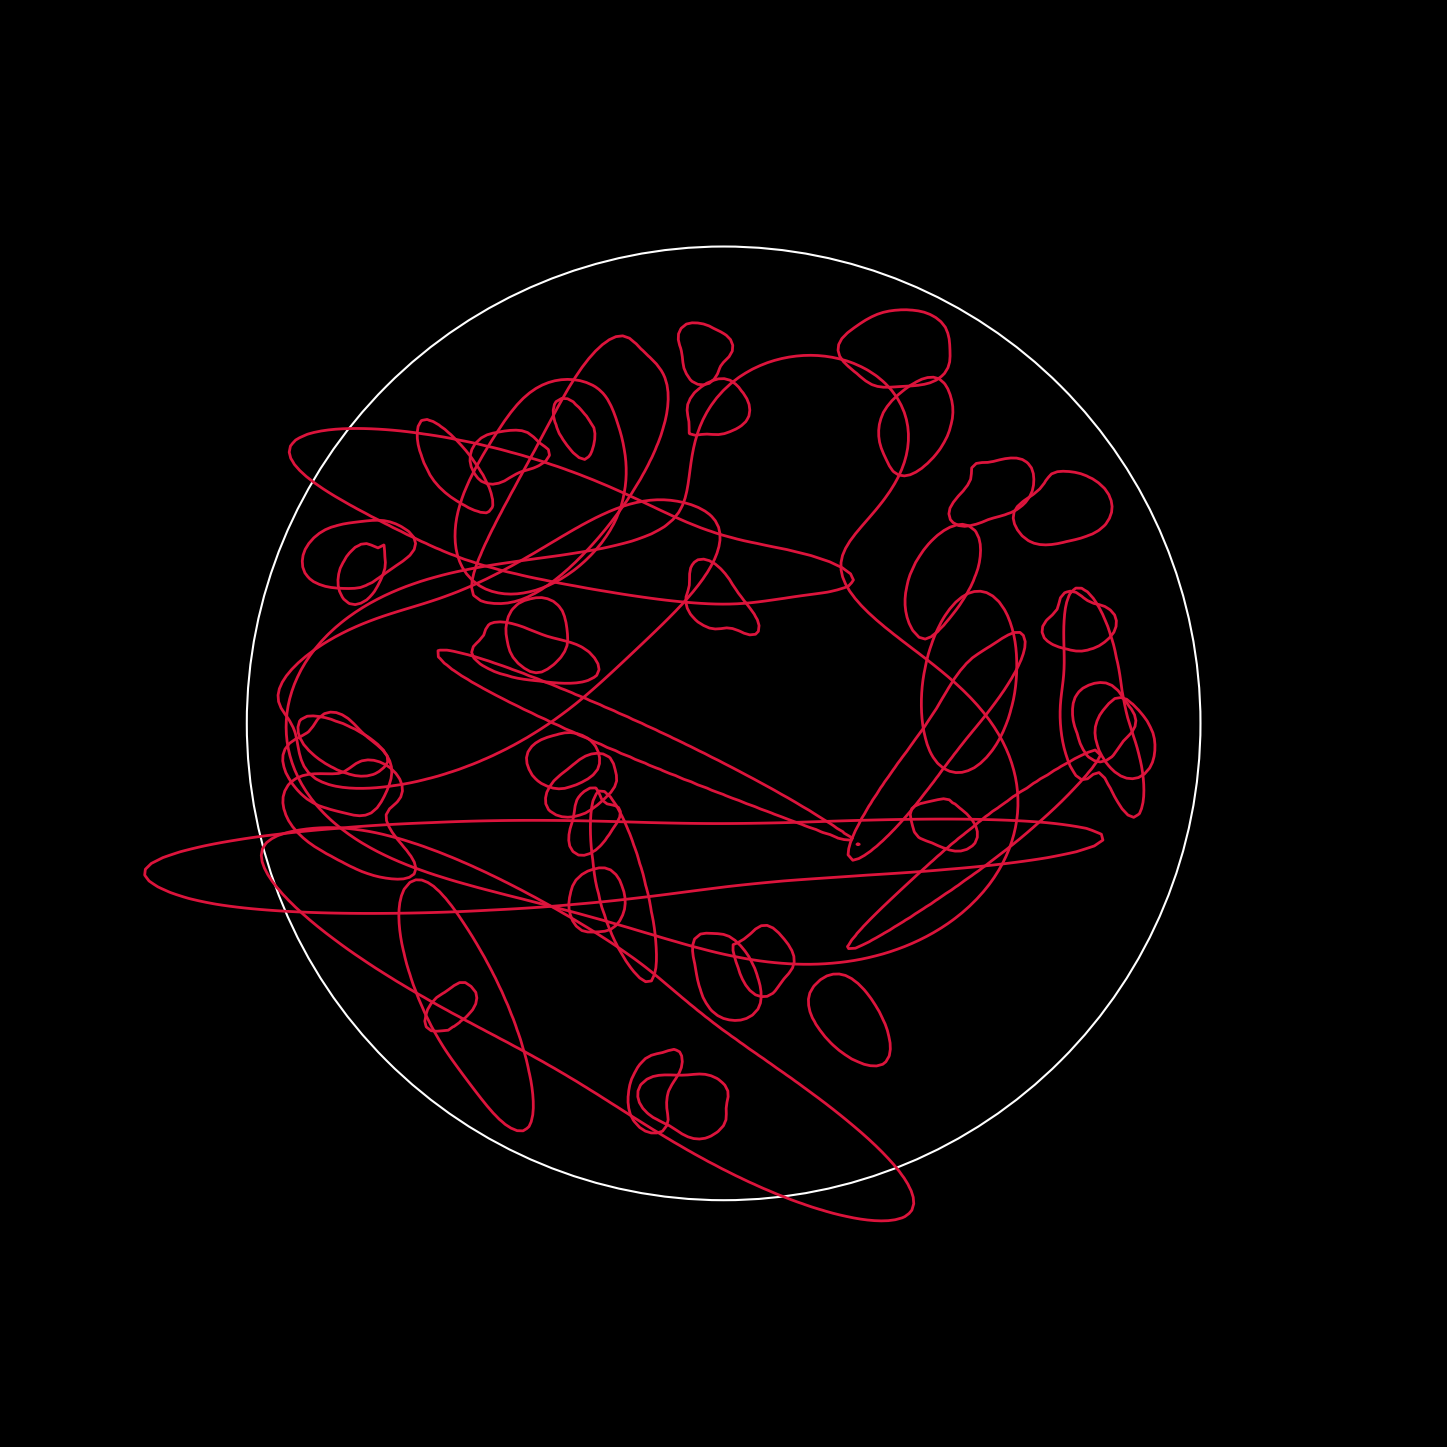

In [46]:
# SAFE - ALL DOMAINS

# Set random seed for reproducibility
random_seed = 887

# Initialize the NetworkPlotter with the NetworkGraph object
plotter = risk.load_plotter(
    graph=graph,
    figsize=(15, 15),
    background_color="black",
)

# Plot network perimeter as a circle
plotter.plot_circle_perimeter(
    scale=1.05,
    center_offset_x=0.0,
    center_offset_y=0.0,
    linestyle="solid",
    linewidth=1.5,
    color="white",
    outline_alpha=1.0,
    fill_alpha=0.0,
)

# Plot custom KDE-based contours around a subset of nodes
plotter.plot_subcontour(
    nodes=safe_domain_to_labels_map.values(),
    levels=5,
    bandwidth=0.8,
    grid_size=250,
    color=safe_color,
    linestyle="solid",
    linewidth=2.0,
    alpha=1.0,
    fill_alpha=0.0,
)

# 350 DPI required for journal Bioinformatics
# plotter.savefig("./png/publication/supp_fig_6f.png", bbox_inches="tight", dpi=350)

# Display the plot
plotter.show()

## Supplementary Figure S6.D & S6.H

RISK / SAFE analysis of the yeast interactome network: Plot unique clusters. Retain nodes in clusters that did not overlap with significant nodes in SAFE / RISK

In [24]:
# Compute the symmetric difference for each domain between SAFE and RISK

diff_domain_to_node = {}

for domain in set(safe_domain_to_ids_map.keys()).union(risk_domain_to_ids_map.keys()):
    safe_nodes = set(safe_domain_to_ids_map.get(domain, []))
    risk_nodes = set(risk_domain_to_ids_map.get(domain, []))

    # Compute symmetric difference: nodes unique to SAFE or RISK
    symmetric_diff = safe_nodes.symmetric_difference(risk_nodes)

    # Only keep non-empty symmetric differences
    if symmetric_diff:
        diff_domain_to_node[domain] = list(symmetric_diff)

In [25]:
# Step 1: Pool all node IDs from both SAFE and RISK

all_safe_nodes = set().union(*safe_domain_to_ids_map.values())
all_risk_nodes = set().union(*risk_domain_to_ids_map.values())

# Step 2: Identify the common nodes between SAFE and RISK across the entire dataset
common_nodes_pool = all_safe_nodes.intersection(all_risk_nodes)

# Step 3: Remove the common nodes from each domain's node lists in both SAFE and RISK
safe_domain_to_unique_ids_map = {}
risk_domain_to_unique_ids_map = {}

for domain in safe_domain_to_ids_map:
    unique_safe = set(safe_domain_to_ids_map[domain]) - common_nodes_pool
    if unique_safe:
        safe_domain_to_unique_ids_map[domain] = list(unique_safe)

for domain in risk_domain_to_ids_map:
    unique_risk = set(risk_domain_to_ids_map[domain]) - common_nodes_pool
    if unique_risk:
        risk_domain_to_unique_ids_map[domain] = list(unique_risk)

# Make mapping of domains to node labels
risk_domain_to_unique_labels_map = {
    k: [graph.node_id_to_node_label_map[v_] for v_ in v]
    for k, v in risk_domain_to_unique_ids_map.items()
}
safe_domain_to_unique_labels_map = {
    k: [graph.node_id_to_node_label_map[v_] for v_ in v]
    for k, v in safe_domain_to_unique_ids_map.items()
}

---------------
Loading plotter
---------------
Contour levels could not be created due to lack of variation in density.
Failed to compute KDE. Skipping contour plot for these nodes.
Contour levels could not be created due to lack of variation in density.


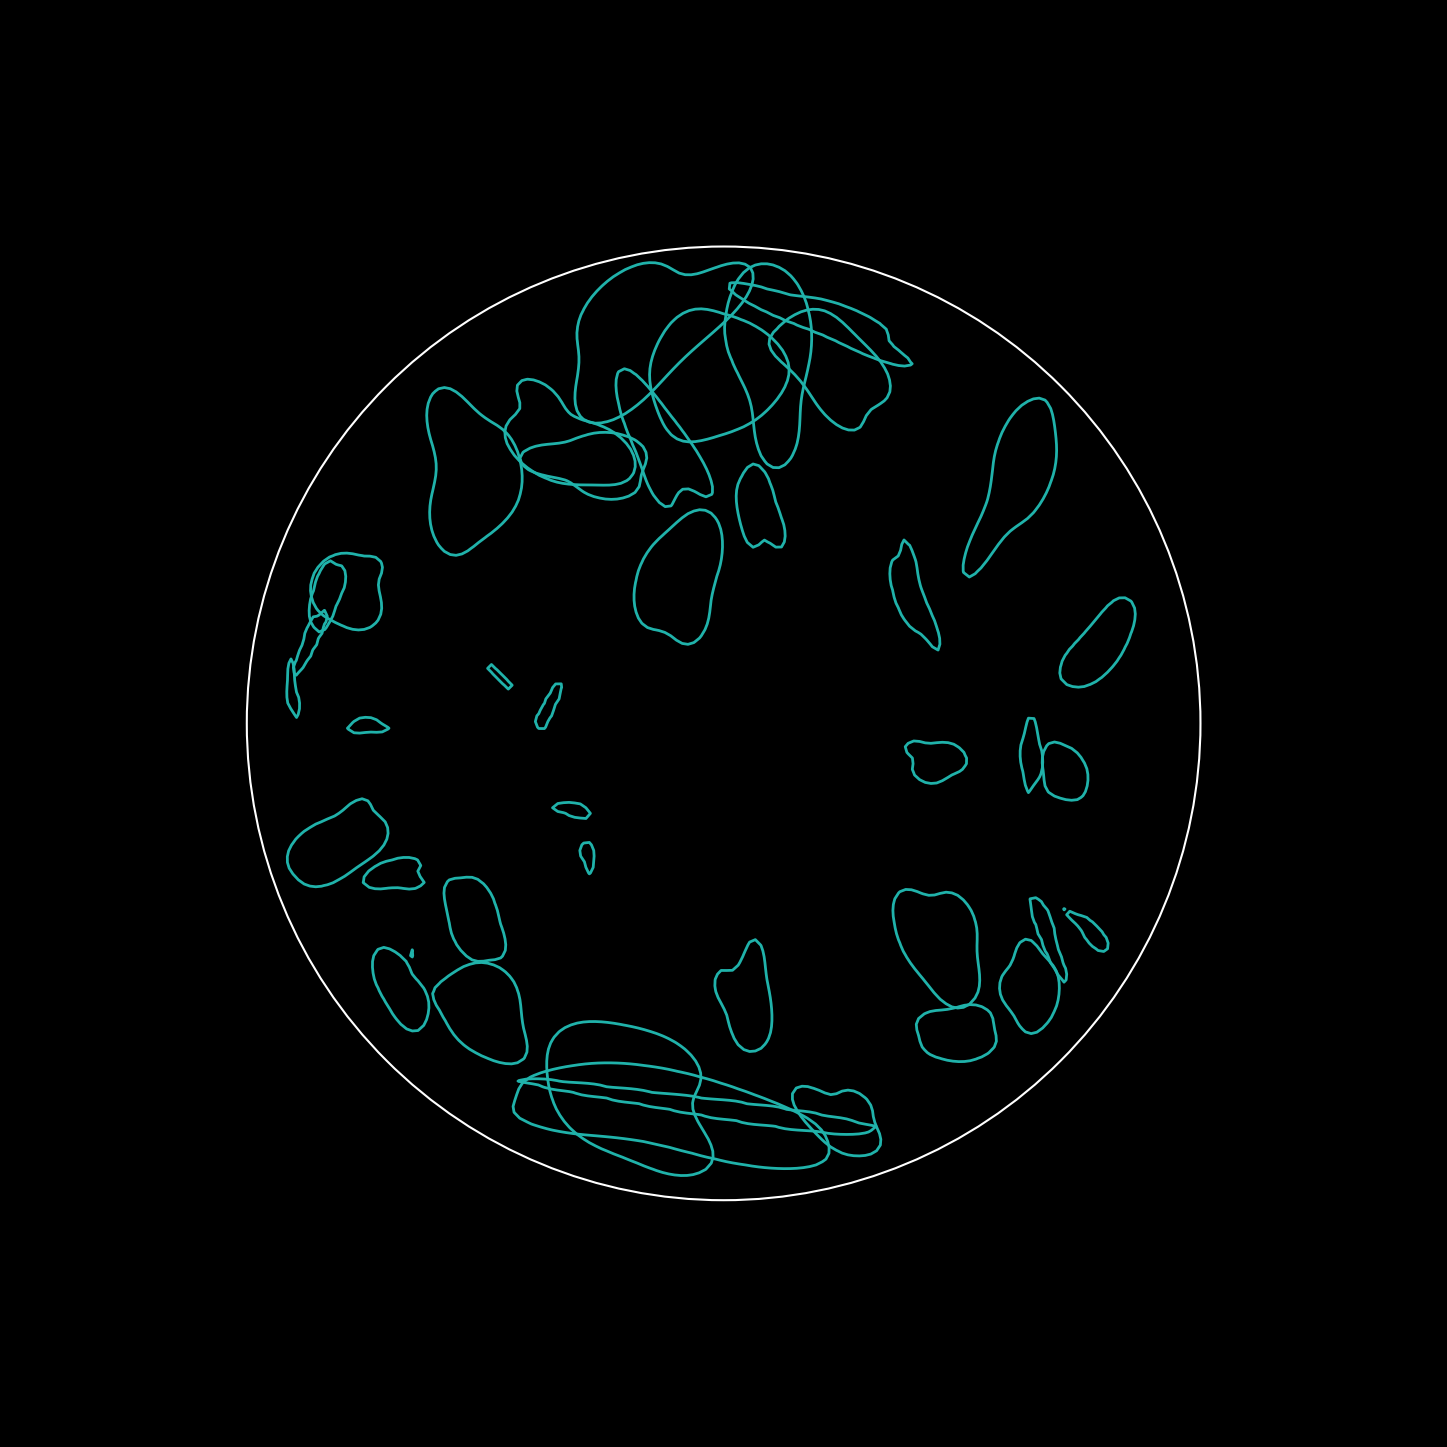

In [47]:
# RISK - UNIQUE DOMAINS

# Set random seed for reproducibility
random_seed = 887

# Initialize the NetworkPlotter with the NetworkGraph object
plotter = risk.load_plotter(
    graph=graph,
    figsize=(15, 15),
    background_color="black",
)

# Plot network perimeter as a circle
plotter.plot_circle_perimeter(
    scale=1.05,
    center_offset_x=0.0,
    center_offset_y=0.0,
    linestyle="solid",
    linewidth=1.5,
    color="white",
    outline_alpha=1.0,
    fill_alpha=0.0,
)

# Plot custom KDE-based contours around a subset of nodes
for nodes in risk_domain_to_unique_labels_map.values():
    try:
        plotter.plot_subcontour(
            nodes=nodes,
            levels=5,
            bandwidth=0.8,
            grid_size=250,
            color=risk_color,
            linestyle="solid",
            linewidth=2.0,
            alpha=1.0,
            fill_alpha=0.0,
        )
    except ValueError:
        continue


# 350 DPI required for journal Bioinformatics
# plotter.savefig("./png/publication/supp_fig_6d.png", bbox_inches="tight", dpi=350)

# Display the plot
plotter.show()

---------------
Loading plotter
---------------
Failed to compute KDE. Skipping contour plot for these nodes.
Failed to compute KDE. Skipping contour plot for these nodes.
Contour levels could not be created due to lack of variation in density.
Failed to compute KDE. Skipping contour plot for these nodes.
Failed to compute KDE. Skipping contour plot for these nodes.
Contour levels could not be created due to lack of variation in density.


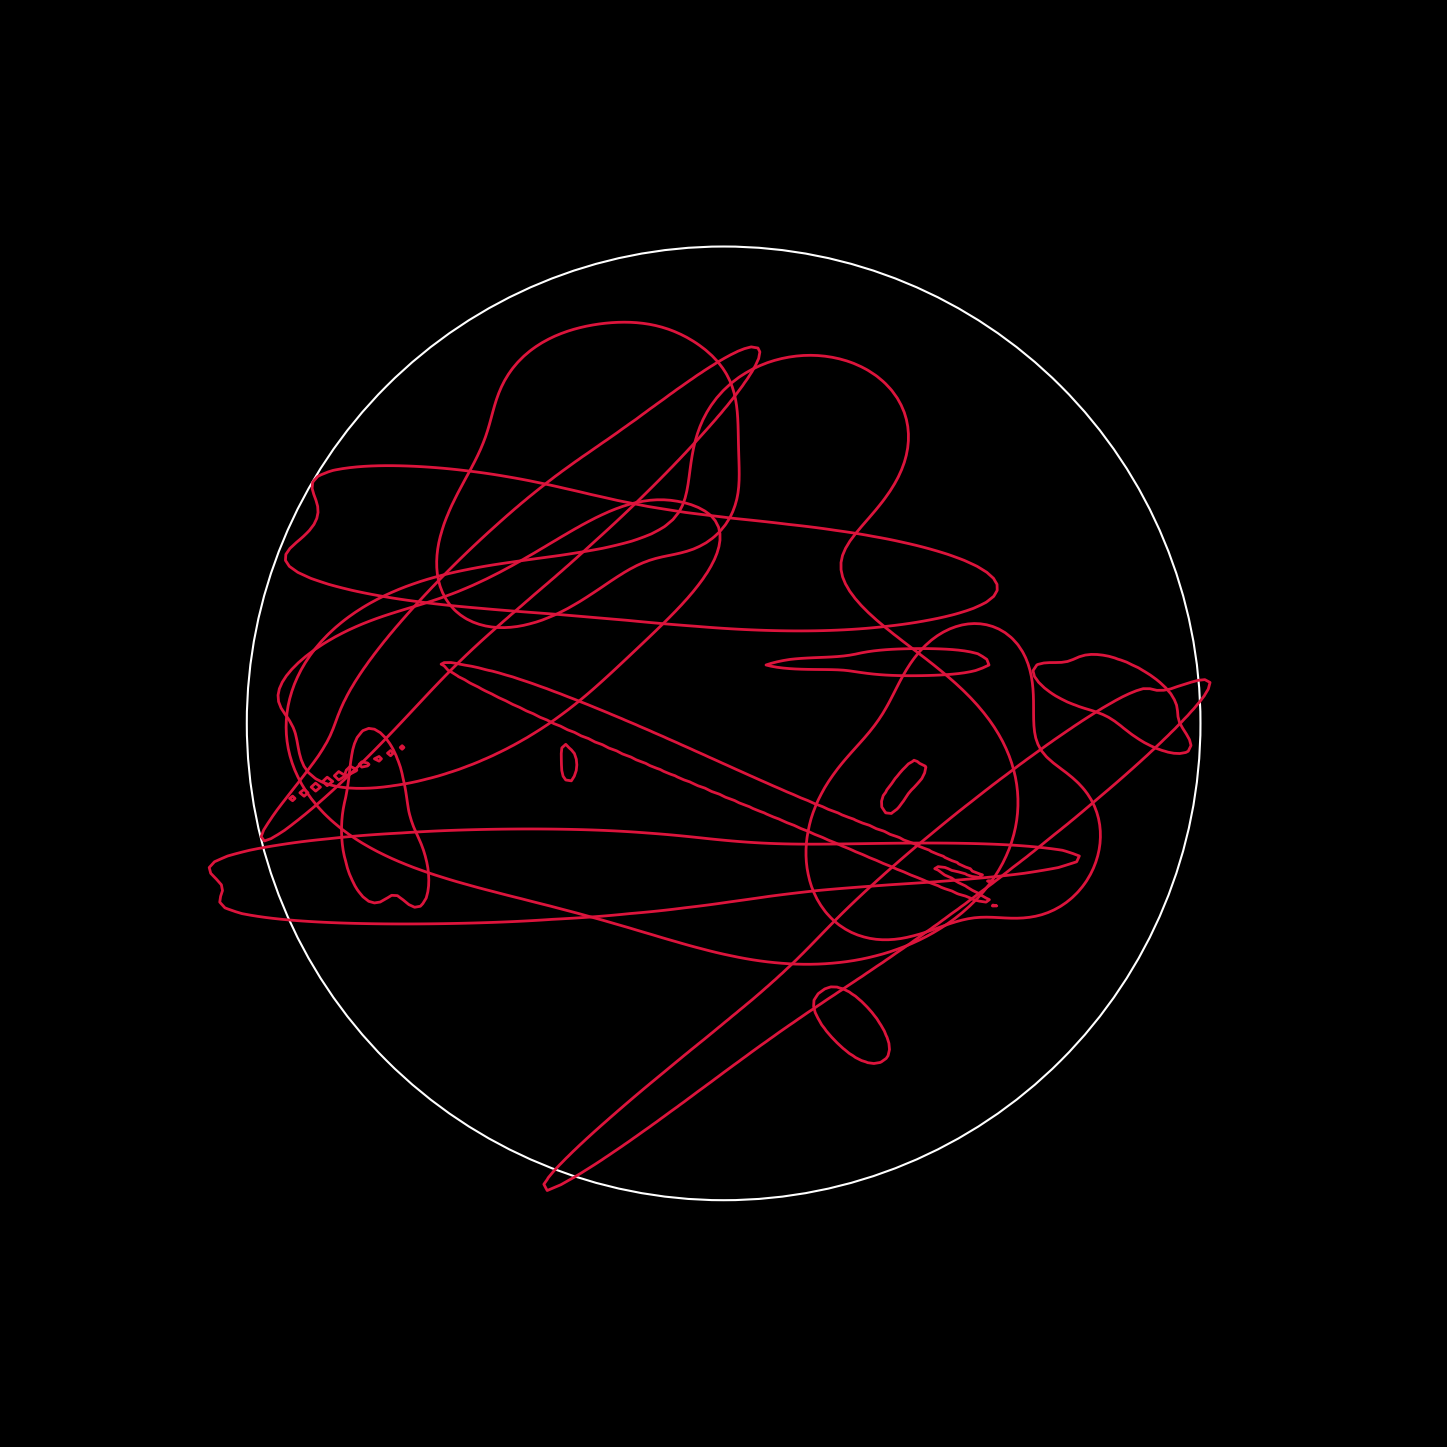

In [48]:
# SAFE - UNIQUE DOMAINS

# Set random seed for reproducibility
random_seed = 887

# Initialize the NetworkPlotter with the NetworkGraph object
plotter = risk.load_plotter(
    graph=graph,
    figsize=(15, 15),
    background_color="black",
)

# Plot network perimeter as a circle
plotter.plot_circle_perimeter(
    scale=1.05,
    center_offset_x=0.0,
    center_offset_y=0.0,
    linestyle="solid",
    linewidth=1.5,
    color="white",
    outline_alpha=1.0,
    fill_alpha=0.0,
)

# Plot custom KDE-based contours around a subset of nodes
for nodes in safe_domain_to_unique_labels_map.values():
    try:
        plotter.plot_subcontour(
            nodes=nodes,
            levels=5,
            bandwidth=0.8,
            grid_size=250,
            color=safe_color,
            linestyle="solid",
            linewidth=2.0,
            alpha=1.0,
            fill_alpha=0.0,
        )
    except ValueError:
        continue


# 350 DPI required for journal Bioinformatics
# plotter.savefig("./png/publication/supp_fig_6h.png", bbox_inches="tight", dpi=350)

# Display the plot
plotter.show()

## Supplementary Figure S6.C & S6.G

RISK / SAFE analysis of the yeast interactome network: Plot shared clusters. Retain nodes in clusters that overlap with were marked significant in SAFE / RISK


In [28]:
# Step 1: Pool all SAFE and RISK nodes across all domains

all_safe_nodes = set().union(*safe_domain_to_ids_map.values())
all_risk_nodes = set().union(*risk_domain_to_ids_map.values())

# Step 2: Compute RISK domains, keeping only nodes found in any SAFE domain
risk_filtered_domain_to_ids_map = {}

for domain, risk_nodes in risk_domain_to_ids_map.items():
    # Only keep nodes in this RISK domain that are also in some SAFE domain
    filtered_nodes = set(risk_nodes).intersection(all_safe_nodes)
    if filtered_nodes:
        risk_filtered_domain_to_ids_map[domain] = list(filtered_nodes)

# Step 3: Compute SAFE domains, keeping only nodes found in any RISK domain
safe_filtered_domain_to_ids_map = {}

for domain, safe_nodes in safe_domain_to_ids_map.items():
    # Only keep nodes in this SAFE domain that are also in some RISK domain
    filtered_nodes = set(safe_nodes).intersection(all_risk_nodes)
    if filtered_nodes:
        safe_filtered_domain_to_ids_map[domain] = list(filtered_nodes)

# Step 4: Convert IDs to labels
risk_filtered_domain_to_labels_map = {
    k: [graph.node_id_to_node_label_map[v_] for v_ in v]
    for k, v in risk_filtered_domain_to_ids_map.items()
}

safe_filtered_domain_to_labels_map = {
    k: [graph.node_id_to_node_label_map[v_] for v_ in v]
    for k, v in safe_filtered_domain_to_ids_map.items()
}

---------------
Loading plotter
---------------


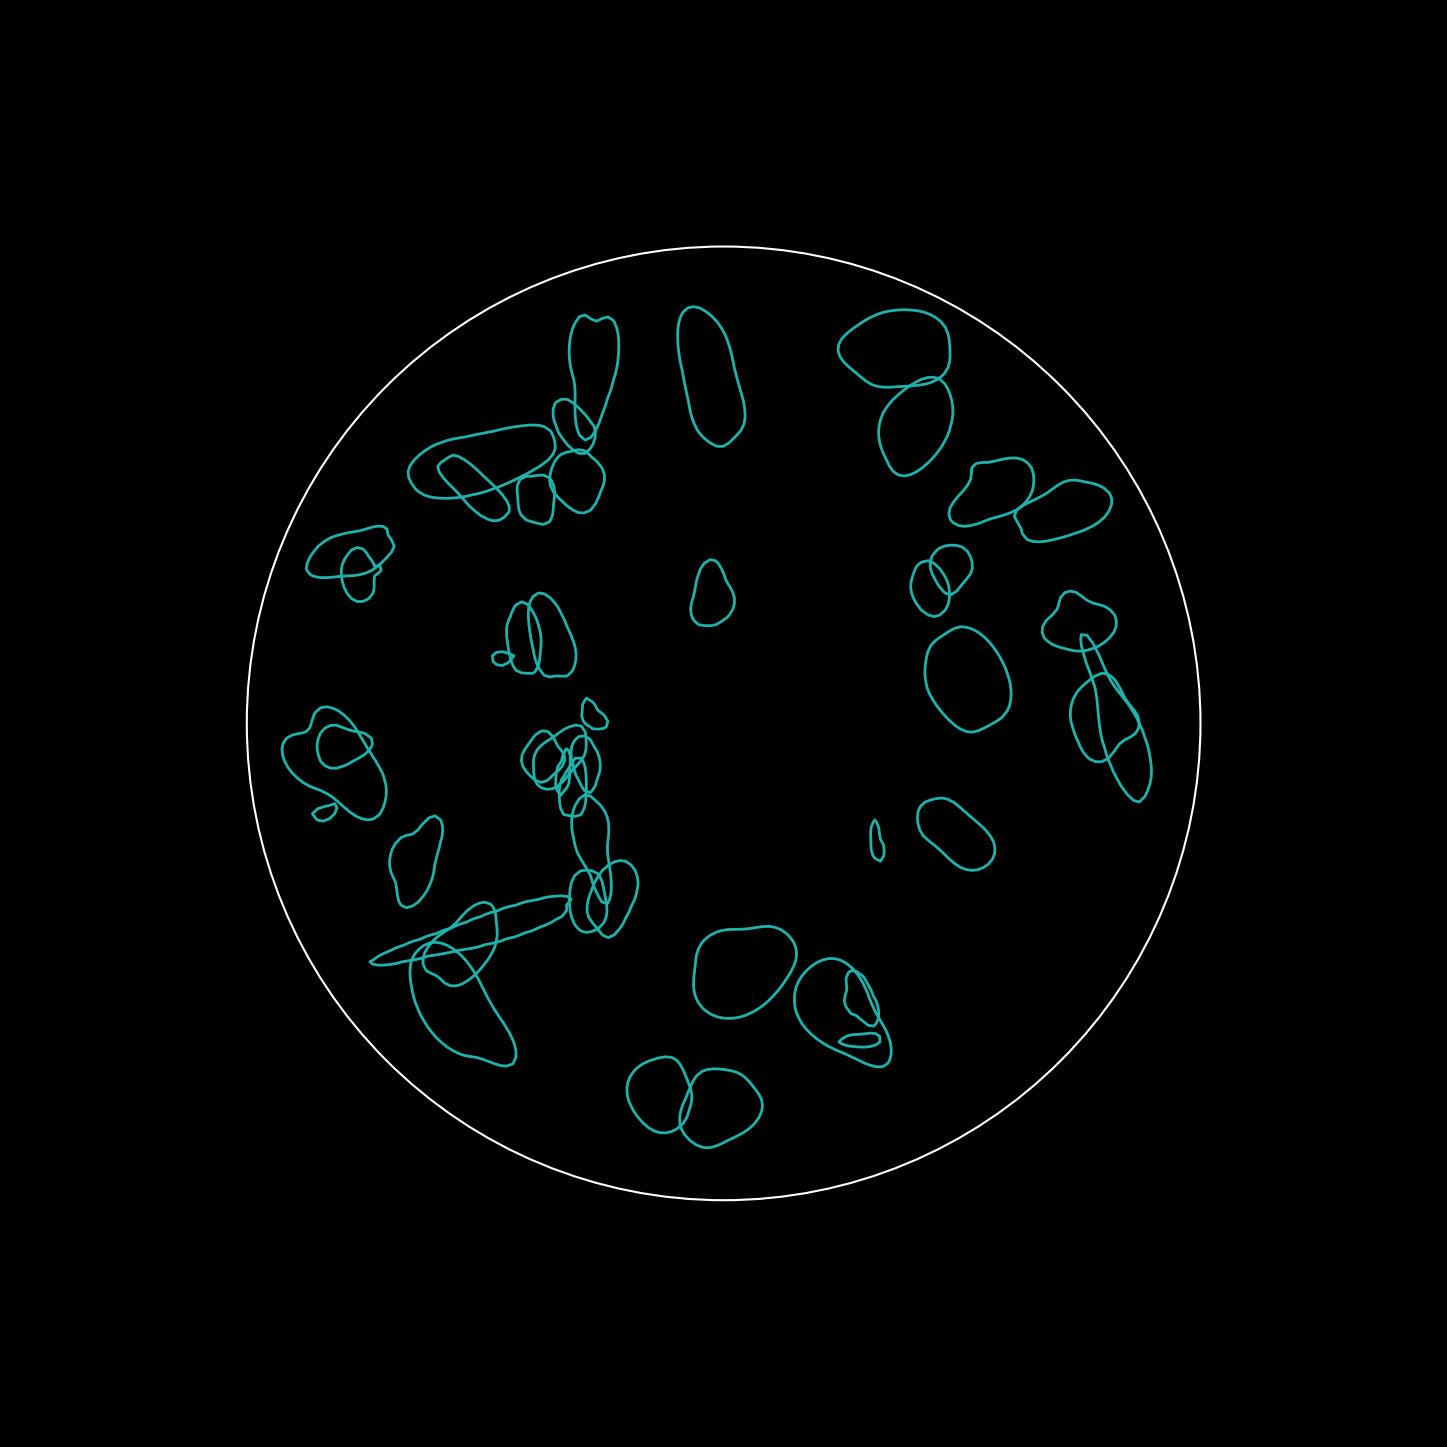

In [49]:
# RISK - COMBINED DOMAINS

# Set random seed for reproducibility
random_seed = 887

# Initialize the NetworkPlotter with the NetworkGraph object
plotter = risk.load_plotter(
    graph=graph,
    figsize=(15, 15),
    background_color="black",
)

# Plot network perimeter as a circle
plotter.plot_circle_perimeter(
    scale=1.05,
    center_offset_x=0.0,
    center_offset_y=0.0,
    linestyle="solid",
    linewidth=1.5,
    color="white",
    outline_alpha=1.0,
    fill_alpha=0.0,
)

# Plot custom KDE-based contours around a subset of nodes
for nodes in risk_filtered_domain_to_labels_map.values():
    try:
        plotter.plot_subcontour(
            nodes=nodes,
            levels=5,
            bandwidth=0.8,
            grid_size=250,
            color=risk_color,
            linestyle="solid",
            linewidth=2.0,
            alpha=1.0,
            fill_alpha=0.0,
        )
    except ValueError:
        continue


# 350 DPI required for journal Bioinformatics
# plotter.savefig("./png/publication/supp_fig_6c.png", bbox_inches="tight", dpi=350)

# Display the plot
plotter.show()

---------------
Loading plotter
---------------


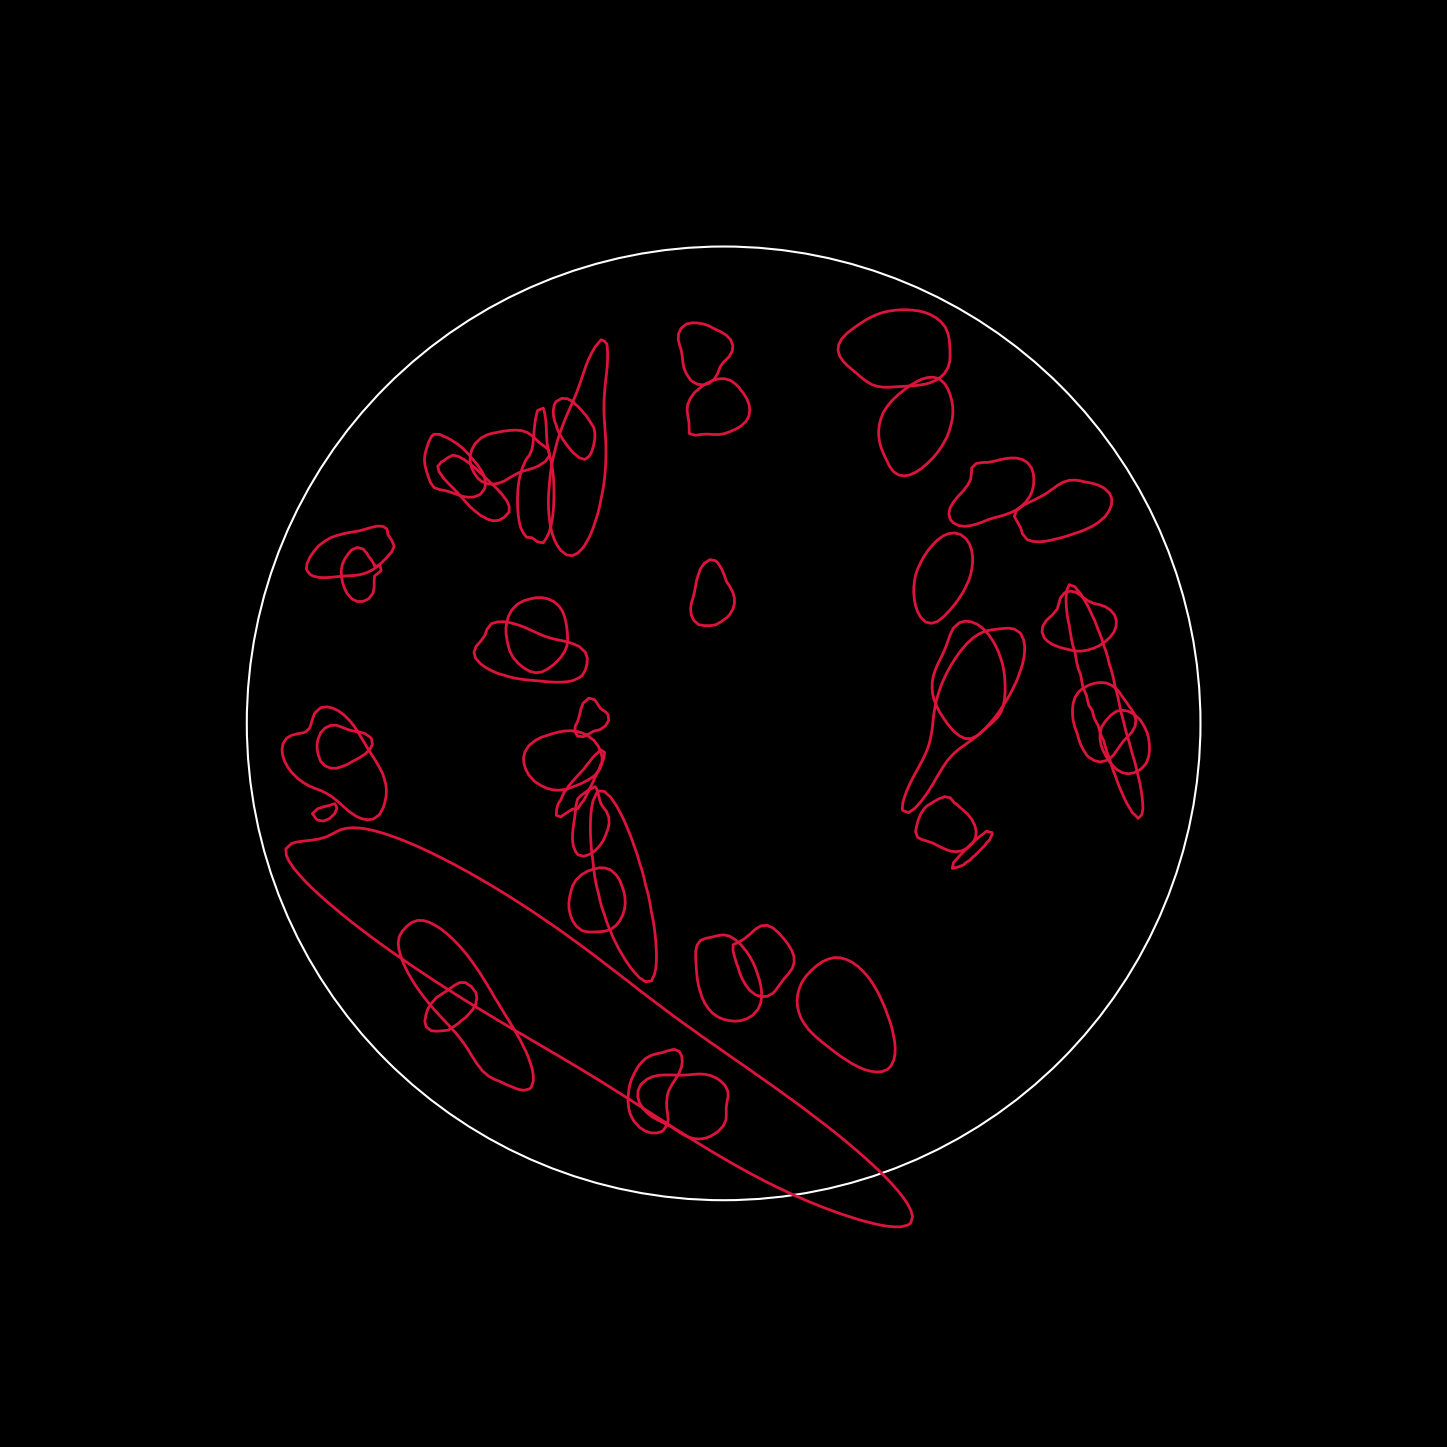

In [79]:
# SAFE - COMBINED DOMAINS

# Set random seed for reproducibility
random_seed = 887

# Initialize the NetworkPlotter with the NetworkGraph object
plotter = risk.load_plotter(
    graph=graph,
    figsize=(15, 15),
    background_color="black",
)

# Plot network perimeter as a circle
plotter.plot_circle_perimeter(
    scale=1.05,
    center_offset_x=0.0,
    center_offset_y=0.0,
    linestyle="solid",
    linewidth=1.5,
    color="white",
    outline_alpha=1.0,
    fill_alpha=0.0,
)

# Plot custom KDE-based contours around a subset of nodes
for domain_id, nodes in safe_filtered_domain_to_labels_map.items():
    # Edge case in the algorithm where two or more nodes from different clusters in RISK were found in one SAFE cluster
    # Remove domain 42, as it is represented in SAFE's unique figure
    if domain_id == 42:
        continue
    try:
        plotter.plot_subcontour(
            nodes=nodes,
            levels=5,
            bandwidth=0.8,
            grid_size=250,
            color=safe_color,
            linestyle="solid",
            linewidth=2.0,
            alpha=1.0,
            fill_alpha=0.0,
        )
    except ValueError:
        continue


# 350 DPI required for journal Bioinformatics
# plotter.savefig("./png/publication/supp_fig_6g.png", bbox_inches="tight", dpi=350)

# Display the plot
plotter.show()

## Supplementary Figure S7

Most enriched GO BP term per cluster in the RISK yeast interactome network

---------------
Loading plotter
---------------


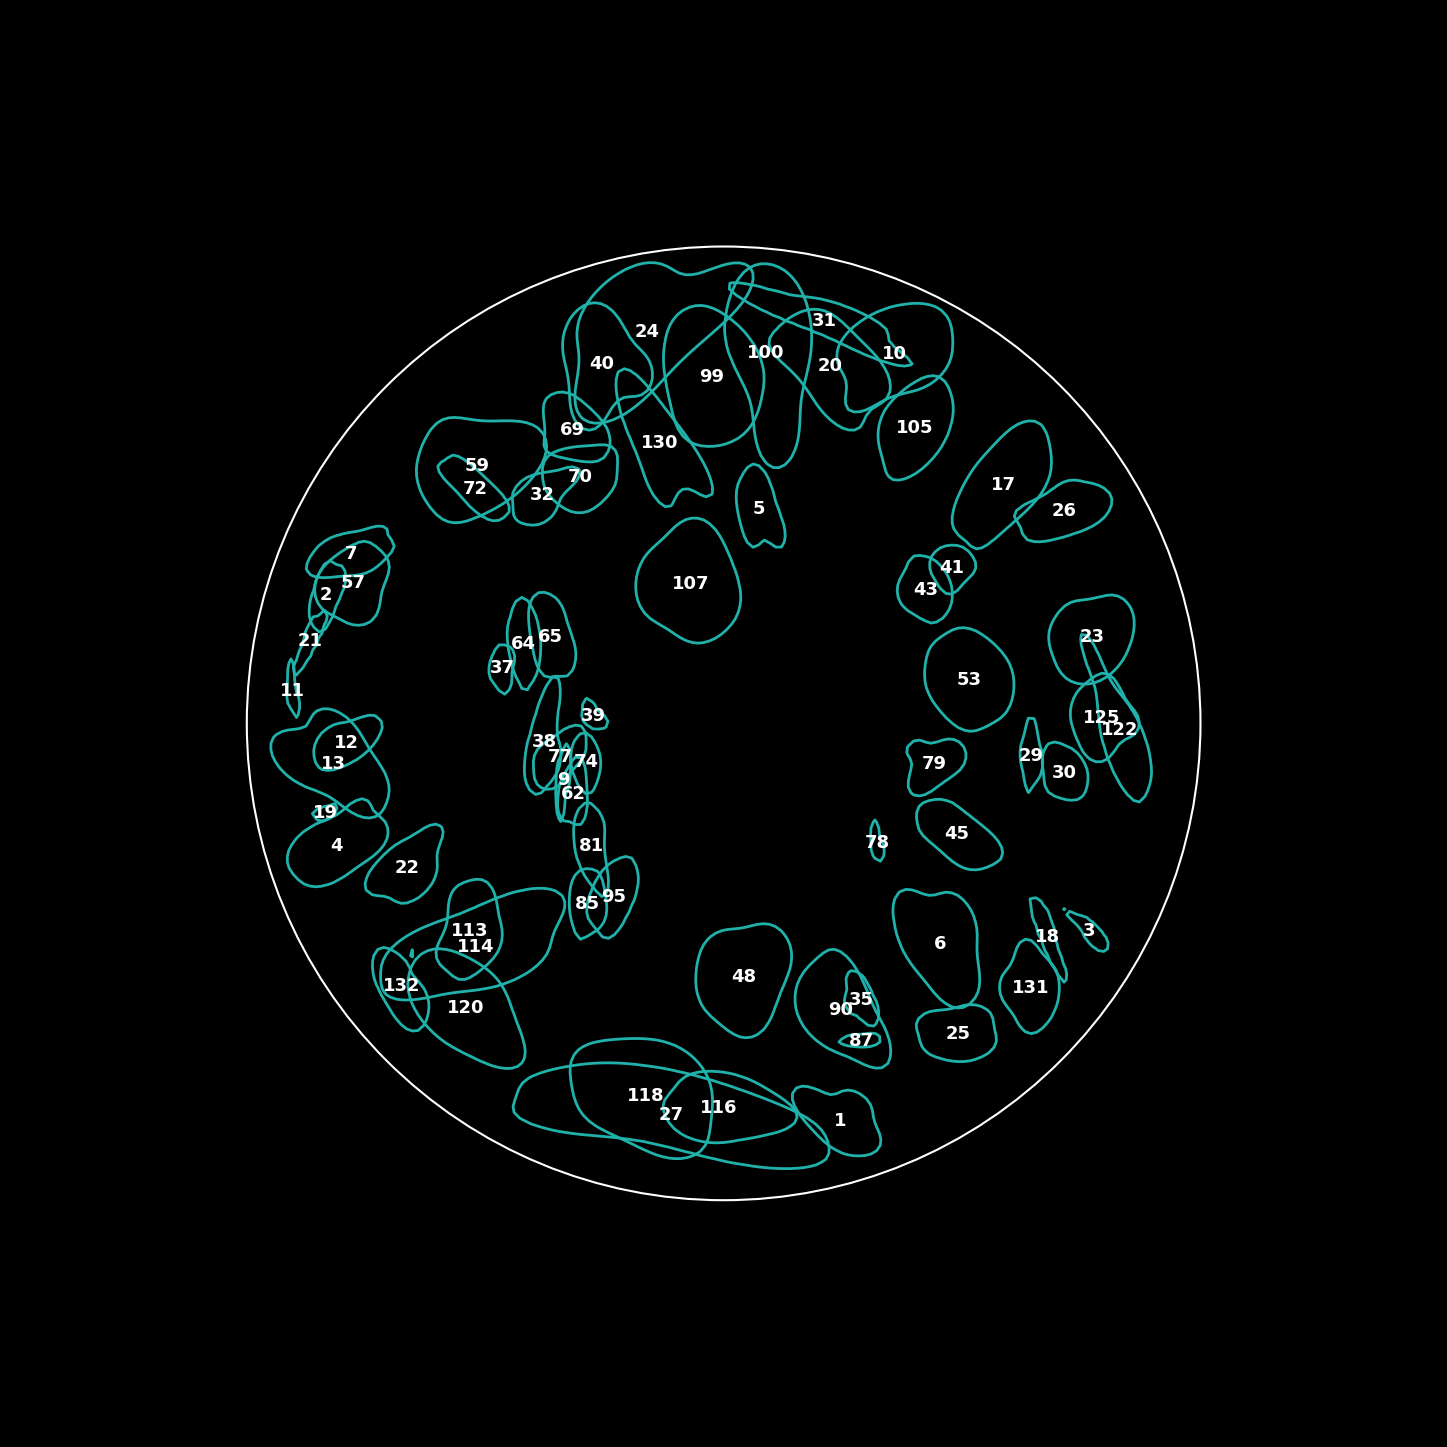

In [165]:
# RISK - ALL DOMAINS WITH OVERLAID IDS

# Set random seed for reproducibility
random_seed = 887

# Initialize the NetworkPlotter with the NetworkGraph object
plotter = risk.load_plotter(
    graph=graph,
    figsize=(15, 15),
    background_color="black",
)

# Plot network perimeter as a circle
plotter.plot_circle_perimeter(
    scale=1.05,
    center_offset_x=0.0,
    center_offset_y=0.0,
    linestyle="solid",
    linewidth=1.5,
    color="white",
    outline_alpha=1.0,
    fill_alpha=0.0,
)

for domain, nodes in sorted(risk_domain_to_labels_map.items()):
    node_ids = [graph.node_label_to_node_id_map[n] for n in nodes]
    # Extract node positions from the NetworkX graph (G)
    node_positions = np.array(
        [
            (graph.network.nodes[n]["x"], graph.network.nodes[n]["y"])
            for n in node_ids
            if n in graph.network.nodes
        ]
    )
    if len(node_positions) > 0:
        # Plot KDE-based contour for this domain
        plotter.plot_subcontour(
            nodes=nodes,
            levels=5,
            bandwidth=0.8,
            grid_size=250,
            color=risk_color,
            linestyle="solid",
            linewidth=2.0,
            alpha=1.0,
            fill_alpha=0.0,
        )

        # Compute centroid (mean x, mean y)
        centroid_x, centroid_y = node_positions.mean(axis=0)
        # Overlay domain ID at centroid
        plt.text(
            centroid_x,
            centroid_y,
            str(domain),
            color="white",
            fontsize=13,
            fontweight="bold",
            ha="center",
            va="center",
        )

# 350 DPI required for journal Bioinformatics
# plotter.savefig("./png/publication/supp_fig_7.png", bbox_inches="tight", dpi=350)

# Display the plot
plotter.show()

In [166]:
from scipy.stats import hypergeom
from statsmodels.stats.multitest import multipletests
import numpy as np


def calculate_domain_enrichment_with_fdr(binary_matrix, domain_to_node, ordered_annotations):
    """
    Calculate the p-value and FDR for each domain, and return a dictionary mapping each domain to its statistics.

    Parameters:
    - binary_matrix (numpy.ndarray): A binary matrix where rows represent nodes and columns represent annotations.
    - domain_to_node (dict): A dictionary where keys are domain IDs and values are lists of node indices.
    - ordered_annotations (list): List of annotation terms corresponding to the columns in the binary matrix.

    Returns:
    - dict: A dictionary where keys are domain IDs, and values are dictionaries containing:
        - "term": The annotation term with the most significant enrichment.
        - "p-value": The p-value for the most significant enrichment.
        - "FDR": The FDR for the most significant enrichment.
    """
    domain_enrichment = {}
    total_nodes, total_annotations = binary_matrix.shape
    all_p_values = []
    domain_pvalues = {}

    # Calculate p-values for all domains
    for domain, node_indices in domain_to_node.items():
        domain_pvalues[domain] = []
        for col in range(total_annotations):
            annotation_col = binary_matrix[:, col]
            total_annotated_nodes = np.sum(annotation_col)
            domain_annotated_nodes = np.sum(annotation_col[node_indices])

            # Hypergeometric test
            M = total_nodes  # Population size
            N = total_annotated_nodes  # Number of successes in population
            n = len(node_indices)  # Number of draws (nodes in the domain)
            x = domain_annotated_nodes  # Number of observed successes (domain-annotated nodes)

            p_value = hypergeom.sf(x - 1, M, N, n)
            domain_pvalues[domain].append((col, p_value))  # Store column index and p-value
            all_p_values.append(p_value)

    # Apply Benjamini-Hochberg FDR correction
    _, fdr_values, _, _ = multipletests(all_p_values, method="fdr_bh")

    # Assign FDR values back to domains and create output
    idx = 0
    for domain, p_vals in domain_pvalues.items():
        best_annotation = None
        min_p_value = float("inf")
        min_fdr = float("inf")

        for col, p_value in p_vals:
            fdr = fdr_values[idx]
            idx += 1

            # Find the annotation with the most significant enrichment
            if fdr < min_fdr or (fdr == min_fdr and p_value < min_p_value):
                min_fdr = fdr
                min_p_value = p_value
                best_annotation = ordered_annotations[col]

        # Store results for the domain
        domain_enrichment[domain] = {
            "term": best_annotation,
            "p-value": min_p_value,
            "FDR": min_fdr,
        }

    # Return the domain enrichment sorted by FDR
    sorted_enrichment = {
        domain: stats
        for domain, stats in sorted(domain_enrichment.items(), key=lambda item: item[1]["FDR"])
    }

    return sorted_enrichment


# Compute GO BP domain enrichment per domain (cluster)
risk_domain_enrichment_results = calculate_domain_enrichment_with_fdr(
    annotations["matrix"], risk_domain_to_ids_map, annotations["ordered_annotations"]
)

Num RISK domains to plot: 68


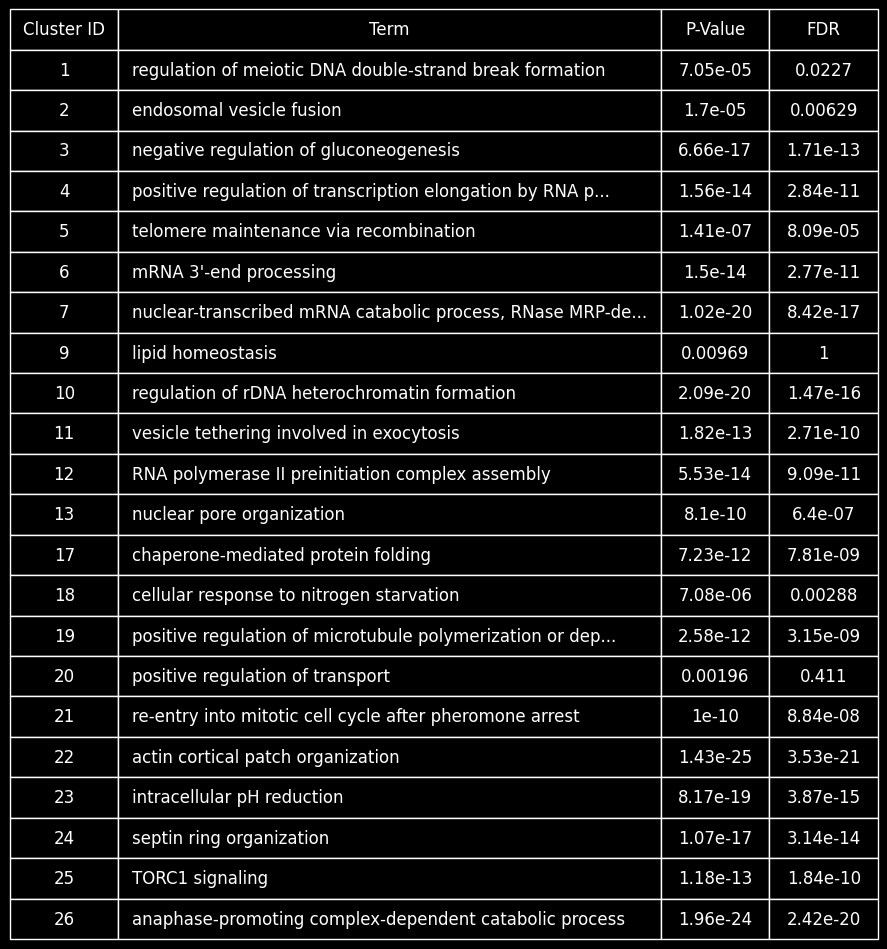

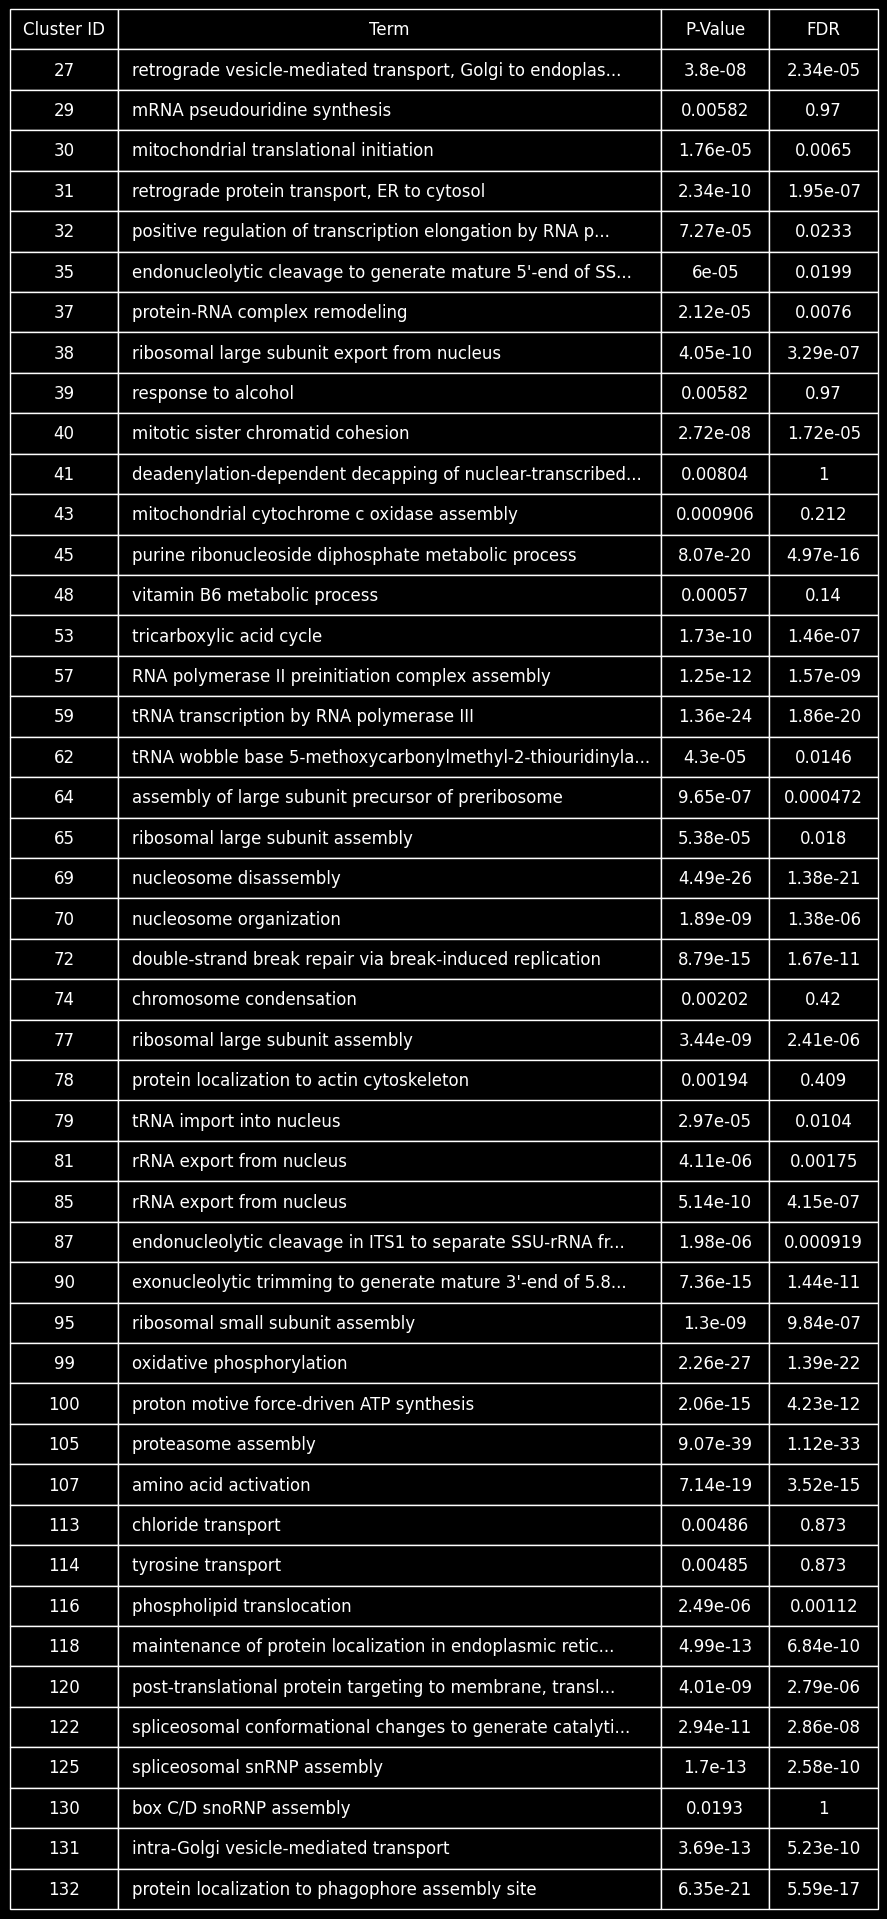

In [167]:
def plot_enrichment_table_from_dict(
    enrichment_data, start=0, stop=None, figsize=(7, 3), char_limit=75, filename=None
):
    """Plot an enrichment table from a dictionary of enrichment data with customizable row ranges."""
    # Convert dictionary to sorted list of rows (by FDR ascending)
    sorted_data = sorted(enrichment_data.items())
    # Slice the data based on start and stop
    sliced_data = sorted_data[start:stop]
    # Convert sliced data to table format with term clipping
    table_data = [
        [
            domain_id,
            (
                (stats["term"][:char_limit].strip() + "...")
                if len(stats["term"]) > char_limit
                else stats["term"]
            ),
            f"{stats['p-value']:.3g}",
            f"{stats['FDR']:.3g}",
        ]
        for domain_id, stats in sliced_data
    ]

    # Define column headers
    columns = ["Cluster ID", "Term", "P-Value", "FDR"]
    # Adjust column widths for a more compact layout
    column_widths = [0.2, 1, 0.2, 0.2]  # Decreased padding

    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_frame_on(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    # Create table with reduced padding
    table = ax.table(
        cellText=table_data,
        colLabels=columns,
        cellLoc="center",
        loc="center",
        colWidths=column_widths,
    )
    # Adjust font size for compactness
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    # Reduce row height for compactness
    row_height = 0.175

    for (i, j), cell in table.get_celld().items():
        cell.set_edgecolor("white")  # White borders for clarity
        cell.set_facecolor("black")  # Black background
        cell.set_text_props(color="white")  # White text for contrast
        cell.set_height(row_height)  # Reduce row height for compactness

        # Left justify content for the "Term" column (column index 1)
        if j == 1 and i > 0:  # Skip the header row
            cell.set_text_props(ha="left", va="center", color="white")

    def set_pad_for_column(col, pad=0.1):
        cells = table.get_celld()
        column = [cell for cell in table.get_celld() if cell[1] == col]
        for cell in column:
            cells[cell].PAD = pad

    # Apply reduced padding for the "Term" column (column index 1)
    set_pad_for_column(col=1, pad=0.025)
    # Add bold underline below headers only
    for j in range(len(columns)):
        table[0, j].set_linewidth(1)

    # Display the table
    if filename:
        plt.savefig(filename, bbox_inches="tight", dpi=1200)

    plt.show()


# Plot RISK enrichment table
print(f"Num RISK domains to plot: {len(risk_domain_enrichment_results)}")

# fmt:off
plot_enrichment_table_from_dict(risk_domain_enrichment_results, start=0, stop=22, char_limit=56, filename=None)  # filename="./png/publication/supp_fig_7pt1.png"
plot_enrichment_table_from_dict(risk_domain_enrichment_results, start=22, stop=1_000, char_limit=56, filename=None)  # filename="./png/publication/supp_fig_7pt2.png"

## Supplementary Figure S8

Most enriched GO BP term per cluster in the RISK yeast interactome network

---------------
Loading plotter
---------------


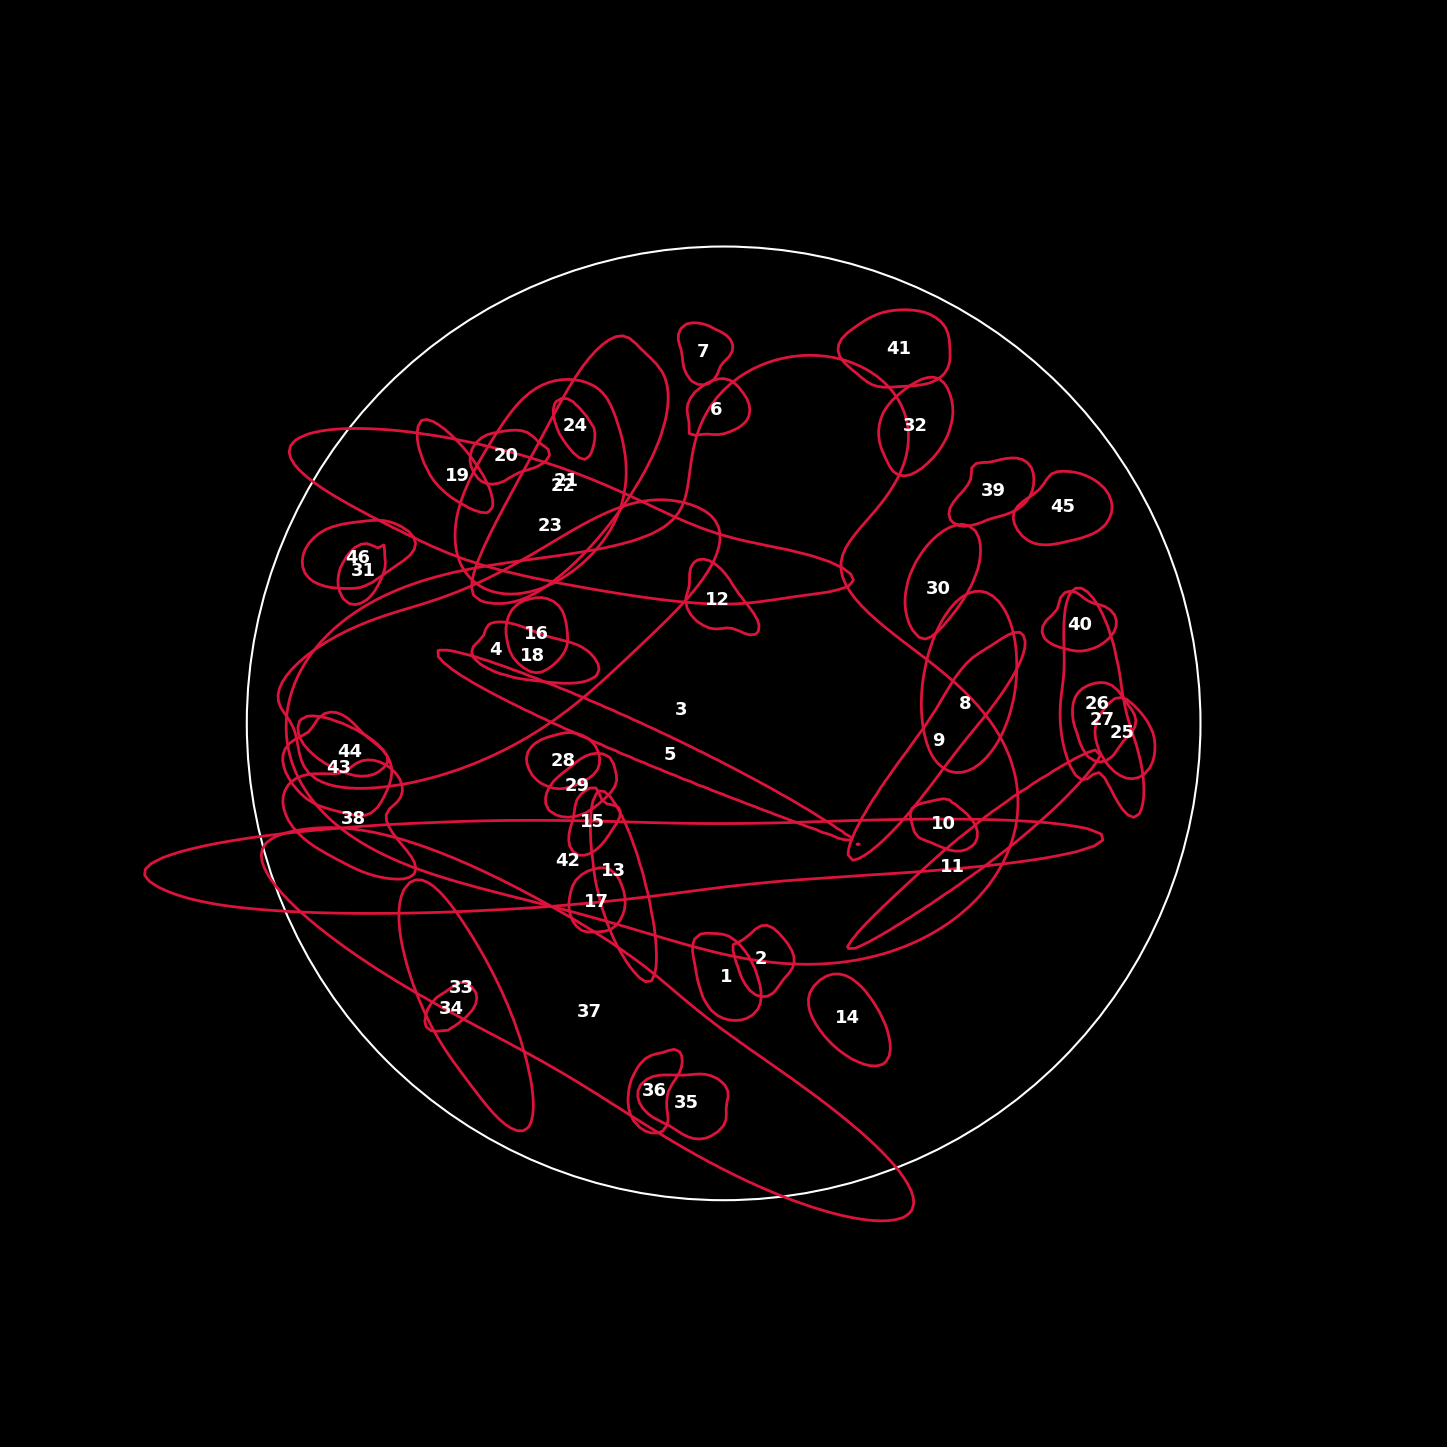

In [54]:
# RISK - ALL DOMAINS WITH OVERLAID IDS

# Set random seed for reproducibility
random_seed = 887

# Initialize the NetworkPlotter with the NetworkGraph object
plotter = risk.load_plotter(
    graph=graph,
    figsize=(15, 15),
    background_color="black",
)

# Plot network perimeter as a circle
plotter.plot_circle_perimeter(
    scale=1.05,
    center_offset_x=0.0,
    center_offset_y=0.0,
    linestyle="solid",
    linewidth=1.5,
    color="white",
    outline_alpha=1.0,
    fill_alpha=0.0,
)

for domain, nodes in sorted(safe_domain_to_labels_map.items()):
    node_ids = [graph.node_label_to_node_id_map[n] for n in nodes]
    # Extract node positions from the NetworkX graph (G)
    node_positions = np.array(
        [
            (graph.network.nodes[n]["x"], graph.network.nodes[n]["y"])
            for n in node_ids
            if n in graph.network.nodes
        ]
    )
    if len(node_positions) > 0:
        # Plot KDE-based contour for this domain
        plotter.plot_subcontour(
            nodes=nodes,
            levels=5,
            bandwidth=0.8,
            grid_size=250,
            color=safe_color,
            linestyle="solid",
            linewidth=2.0,
            alpha=1.0,
            fill_alpha=0.0,
        )

        # Compute centroid (mean x, mean y)
        centroid_x, centroid_y = node_positions.mean(axis=0)
        # Overlay domain ID at centroid
        plt.text(
            centroid_x,
            centroid_y,
            str(domain),
            color="white",
            fontsize=13,
            fontweight="bold",
            ha="center",
            va="center",
        )

# 350 DPI required for journal Bioinformatics
# plotter.savefig("./png/publication/supp_fig_8.png", bbox_inches="tight", dpi=350)

# Display the plot
plotter.show()

In [35]:
# Compute GO BP domain enrichment per domain (cluster)
safe_domain_enrichment_results = calculate_domain_enrichment_with_fdr(
    annotations["matrix"], safe_domain_to_ids_map, annotations["ordered_annotations"]
)

Num SAFE domains to plot: 46


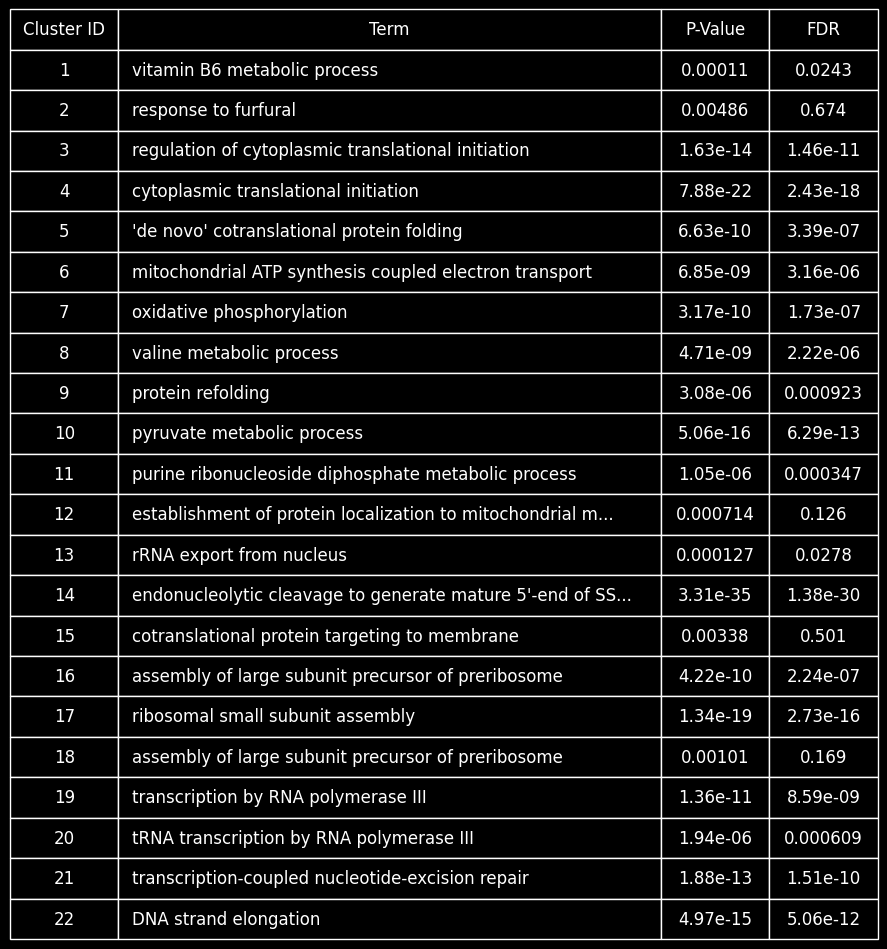

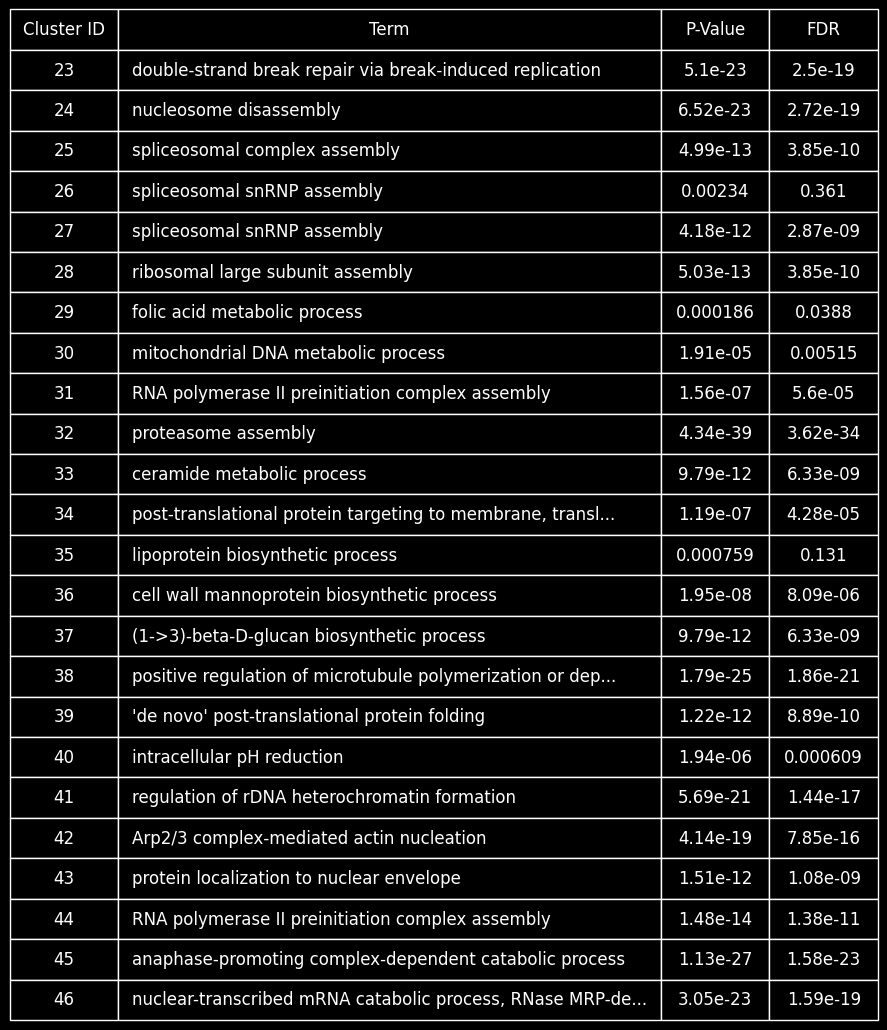

In [55]:
# Plot SAFE enrichment table
print(f"Num SAFE domains to plot: {len(safe_domain_enrichment_results)}")
plot_enrichment_table_from_dict(
    safe_domain_enrichment_results, start=0, stop=22, char_limit=56, filename=None
)  # filename="./png/publication/supp_fig_8pt1.png"
plot_enrichment_table_from_dict(
    safe_domain_enrichment_results, start=22, stop=1_000, char_limit=56, filename=None
)  # filename="./png/publication/supp_fig_8pt2.png"

## Additional analysis

This section is to back a claim made about the trimmed yeast PPI network in section 3.1 of the manuscript:

"RISK identified compact, functionally enriched clusters that reveal modular biological organization, such as ribosomal assembly, mitochondrial organization, and RNA polymerase activity (P < 0.0001)."

In [56]:
# Perform separate statistical test to achieve higher P-value resolution per annotation term

# Use chi-squared test for speed
neighborhoods_chi2 = risk.load_neighborhoods_by_chi2(
    network=network,
    annotations=annotations,
    distance_metric="louvain",
    louvain_resolution=10.0,
    leiden_resolution=1.0,
    fraction_shortest_edges=0.275,
    null_distribution="network",
    random_seed=887,
)
graph_chi2 = risk.load_graph(
    network=network,
    annotations=annotations,
    neighborhoods=neighborhoods_chi2,
    tail="right",
    pval_cutoff=0.05,
    fdr_cutoff=1.00,
    impute_depth=0,
    prune_threshold=0.125,
    linkage_criterion="distance",
    linkage_method="single",
    linkage_metric="dice",
    min_cluster_size=4,
    max_cluster_size=1_000,
)

------------------------
Running chi-squared test
------------------------
Null distribution: 'network'
Distance metric: 'louvain (resolution=10.0)'
Edge length threshold: 0.275
Random seed: 887
---------------------------------
Finding significant neighborhoods
---------------------------------
p-value cutoff: 0.05
FDR BH cutoff: 1.0
Significance tail: 'right' (enrichment)
------------------------
Processing neighborhoods
------------------------
Imputation depth: 0
Pruning threshold: 0.125
-----------------------
Finding top annotations
-----------------------
Min cluster size: 4
Max cluster size: 1000
-----------------------------------------
Optimizing distance threshold for domains
-----------------------------------------


Evaluating optimal linkage method and metric: 100%|███████████████████████████████████| 1/1 [00:02<00:00]


Linkage criterion: 'distance'
Linkage method: 'single'
Linkage metric: 'dice'
Optimal linkage threshold: 0.063


In [57]:
# Load table mapping significance to annotation terms

graph_chi2_summary = graph_chi2.summary.load()
graph_chi2_summary = graph_chi2_summary.sort_values("Enrichment P-Value")

# Define the keywords to search for in the annotations.
keywords = ["ribosom", "mitochond", "RNA polym"]

# Loop over each keyword, filter the DataFrame, and print the top 5 results.
# (We assume that the DataFrame has a column called 'Annotation' that holds the annotation text.)
for keyword in keywords:
    print(f"Results for '{keyword}':")
    # Filter rows where 'Annotation' contains the keyword (case-insensitive)
    matches = graph_chi2_summary[
        graph_chi2_summary["Annotation"].str.contains(keyword, case=False, na=False)
    ]
    # Sort the filtered results by 'Enrichment P-value'
    matches = matches.sort_values("Enrichment P-Value")
    # Get the top 5 results (or fewer if there aren't enough matches)
    top_matches = matches.head(5)

    # Check if there are any matches at all
    if top_matches.empty:
        print("  No matching annotations found.")
    else:
        # Print each matching annotation and its corresponding p-value
        for idx, row in top_matches.iterrows():
            annotation = row["Annotation"]
            p_value = row["Enrichment P-Value"]
            print(f"  {annotation}: {p_value}")

    # Add a blank line between keyword sections for readability
    print()

------------------------
Loading analysis summary
------------------------
Results for 'ribosom':
  assembly of large subunit precursor of preribosome: 5.6118828468948495e-36
  ribosomal large subunit assembly: 4.8040150716065634e-27
  negative regulation of ribosomal protein gene transcription by RNA polymerase II: 1.1157692098037243e-22
  ribosome-associated ubiquitin-dependent protein catabolic process: 1.0
  ribosomal large subunit export from nucleus: 1.0

Results for 'mitochond':
  mitochondrial ATP synthesis coupled electron transport: 4.3512224032070396e-139
  mitochondrial electron transport, ubiquinol to cytochrome c: 2.1072104375889592e-90
  mitochondrial electron transport, cytochrome c to oxygen: 2.7782009842619965e-69
  establishment of mitochondrion localization: 5.593283155419931e-33
  mitochondrial translational initiation: 1.468068538924653e-31

Results for 'RNA polym':
  tRNA transcription by RNA polymerase III: 7.685607805302175e-129
  transcription by RNA polymeras